In [1]:
import numpy as np
import os
import ast
from tqdm import tqdm
from tqdm.notebook import tqdm

%matplotlib inline
import matplotlib.pyplot as plt

import pickle

In [2]:
working_dir = os.getcwd()
parent_dir = os.path.dirname(working_dir)
data_dir = os.path.join(parent_dir, 'data')


data_hamiltonians_file = os.path.join(data_dir, 'hamiltonians.txt')


fullH_dir = os.path.join(data_dir, 'fullHamiltonians')
fullH_sub_JW_dir = os.path.join(fullH_dir, 'JW')


In [3]:
# Tapered Hamiltonians
with open(data_hamiltonians_file, 'r') as input_file:
    tapered_hamiltonians = ast.literal_eval(input_file.read())
    
tapered_H_size_qubits = {
                            mol_key: {'n_qubits': tapered_hamiltonians[mol_key][1],
                                      'n_terms': len(tapered_hamiltonians[mol_key][2])}
                            for mol_key in tapered_hamiltonians}
del tapered_hamiltonians

In [4]:
for key in tapered_H_size_qubits.keys():
    print(f"{key: <30}     No. terms:  {tapered_H_size_qubits[key]['n_terms']:<7.0f}  No.qubits:  {tapered_H_size_qubits[key]['n_qubits']:<5.0f}")


H2-S1_STO-3G_singlet               No. terms:  6237     No.qubits:  18   
C1-O1_STO-3G_singlet               No. terms:  4409     No.qubits:  16   
H1-Cl1_STO-3G_singlet              No. terms:  4409     No.qubits:  16   
H1-Na1_STO-3G_singlet              No. terms:  4409     No.qubits:  16   
H2-Mg1_STO-3G_singlet              No. terms:  3540     No.qubits:  17   
H1-F1_3-21G_singlet                No. terms:  6852     No.qubits:  18   
H1-Li1_3-21G_singlet               No. terms:  6852     No.qubits:  18   
Be1_STO-3G_singlet                 No. terms:  102      No.qubits:  5    
H1-F1_STO-3G_singlet               No. terms:  558      No.qubits:  8    
H1-Li1_STO-3G_singlet              No. terms:  558      No.qubits:  8    
Ar1_STO-3G_singlet                 No. terms:  1465     No.qubits:  13   
F2_STO-3G_singlet                  No. terms:  2229     No.qubits:  15   
H1-O1_STO-3G_singlet               No. terms:  558      No.qubits:  8    
H2-Be1_STO-3G_singlet              No.

In [224]:


input_list = []
for key in myriad_CS_VQE_SeqRot_results.keys():
    input_list.append((key, len(myriad_CS_VQE_SeqRot_results[key].keys())-1))
input_list

26

In [ ]:
tapered_H_size_qubits.keys():

In [5]:
# Pre tapered Hamiltonians
data_pretap_hamiltonians_file = os.path.join(data_dir, 'Hamiltonians_pre_tapering.txt')
with open(data_pretap_hamiltonians_file, 'r') as input_file:
    NON_tapered_hamiltonians = ast.literal_eval(input_file.read())

NON_tapered_H_size_qubits = {
                            mol_key: {'n_qubits': len(list(NON_tapered_hamiltonians[mol_key].keys())[0]),
                                      'n_terms': len(NON_tapered_hamiltonians[mol_key])}
                            for mol_key in NON_tapered_hamiltonians}
del NON_tapered_hamiltonians

In [6]:
for key in NON_tapered_H_size_qubits.keys():
    print(f"{key: <60}     No. terms:  {NON_tapered_H_size_qubits[key]['n_terms']:<7.0f}  No.qubits:  {NON_tapered_H_size_qubits[key]['n_qubits']:<5.0f}")

Ne1_STO-3G_singlet_NeNe                                          No. terms:  156      No.qubits:  10   
O2_STO-3G_triplet_O2O2                                           No. terms:  3075     No.qubits:  20   
Na1_STO-3G_doublet_NaNa                                          No. terms:  3340     No.qubits:  18   
H2-C2_STO-3G_singlet_EthyneEthyne                                No. terms:  6401     No.qubits:  24   
H1-N1-O3_STO-3G_singlet_HNO3HNO3                                 No. terms:  280136   No.qubits:  42   
H1-F1_3-21G_singlet_HF_3-21GHF_3-21G                             No. terms:  13958    No.qubits:  22   
Cl1_STO-3G_doublet_ClCl                                          No. terms:  2092     No.qubits:  18   
H2-C1-O1_STO-3G_singlet_MethanalMethanal                         No. terms:  9257     No.qubits:  24   
P1_STO-3G_quartet_PP                                             No. terms:  3388     No.qubits:  18   
H2-O1_3-21G_singlet_H2O_3-21GH2O_3-21G                          

In [7]:
# molecule names in hamiltonians and hamiltonians before tapering are different
# requires using regular expressions to select correct terms
# done below (code replaces pre-tapered hamiltonian names with naming done by Will!)

import re
pre_tap_hamiltonians_relevent={}
for mol_name_PreT in NON_tapered_H_size_qubits:
    for mol_name in tapered_H_size_qubits.keys():
        if bool(re.match(f'^{mol_name}.*$', mol_name_PreT)): # NO wildcard at front. Wildcard at end
            pre_tap_hamiltonians_relevent[mol_name] = NON_tapered_H_size_qubits[mol_name_PreT]

In [8]:
pre_tap_hamiltonians_relevent

{'Ne1_STO-3G_singlet': {'n_qubits': 10, 'n_terms': 156},
 'H1-F1_3-21G_singlet': {'n_qubits': 22, 'n_terms': 13958},
 'H1-F1_STO-3G_singlet': {'n_qubits': 12, 'n_terms': 631},
 'Mg1_STO-3G_singlet': {'n_qubits': 18, 'n_terms': 3388},
 'H3_3-21G_singlet_1+': {'n_qubits': 12, 'n_terms': 1501},
 'H2-S1_STO-3G_singlet': {'n_qubits': 22, 'n_terms': 6246},
 'O2_STO-3G_singlet': {'n_qubits': 20, 'n_terms': 2255},
 'H1-Li1_STO-3G_singlet': {'n_qubits': 12, 'n_terms': 631},
 'H2-Be1_STO-3G_singlet': {'n_qubits': 14, 'n_terms': 666},
 'H1-Li1_3-21G_singlet': {'n_qubits': 22, 'n_terms': 8758},
 'H1-Na1_STO-3G_singlet': {'n_qubits': 20, 'n_terms': 5851},
 'H4-N1_STO-3G_singlet_1+': {'n_qubits': 18, 'n_terms': 6892},
 'H2-Mg1_STO-3G_singlet': {'n_qubits': 22, 'n_terms': 4582},
 'H1-He1_STO-3G_singlet': {'n_qubits': 4, 'n_terms': 27},
 'C1-O1_STO-3G_singlet': {'n_qubits': 20, 'n_terms': 5475},
 'H3-N1_STO-3G_singlet': {'n_qubits': 16, 'n_terms': 4293},
 'H3_STO-3G_singlet_1+': {'n_qubits': 6, 'n_ter

In [9]:
sorted(list(pre_tap_hamiltonians_relevent.keys())) == sorted(list(tapered_H_size_qubits.keys()))

True

In [10]:
for key in tapered_H_size_qubits.keys():
    print(f"{key: <25}     No. terms original:  {pre_tap_hamiltonians_relevent[key]['n_terms']:<6.0f}   No. terms tapering:  {tapered_H_size_qubits[key]['n_terms']:<5.0f}")

H2-S1_STO-3G_singlet          No. terms original:  6246     No. terms tapering:  6237 
C1-O1_STO-3G_singlet          No. terms original:  5475     No. terms tapering:  4409 
H1-Cl1_STO-3G_singlet         No. terms original:  8159     No. terms tapering:  4409 
H1-Na1_STO-3G_singlet         No. terms original:  5851     No. terms tapering:  4409 
H2-Mg1_STO-3G_singlet         No. terms original:  4582     No. terms tapering:  3540 
H1-F1_3-21G_singlet           No. terms original:  13958    No. terms tapering:  6852 
H1-Li1_3-21G_singlet          No. terms original:  8758     No. terms tapering:  6852 
Be1_STO-3G_singlet            No. terms original:  156      No. terms tapering:  102  
H1-F1_STO-3G_singlet          No. terms original:  631      No. terms tapering:  558  
H1-Li1_STO-3G_singlet         No. terms original:  631      No. terms tapering:  558  
Ar1_STO-3G_singlet            No. terms original:  2092     No. terms tapering:  1465 
F2_STO-3G_singlet             No. terms ori

# Import Myriad Results

In [193]:
prune_threshold = 1e-7

In [11]:
## import LCU results
results_dir = os.path.join(working_dir, 'SeqRot_LCU_script_A_results')

myriad_CS_VQE_LCU_results = {}
for filename in os.listdir(results_dir):
    if (filename.endswith('.pickle') and filename.startswith('LCU_CS_VQE_exp')):
        file_path = os.path.join(results_dir, filename) 
        mol_name = filename[40:-8]
        with open(file_path,'rb') as infile:
            data = pickle.load(infile)

        myriad_CS_VQE_LCU_results[mol_name] = data

In [194]:
### PRUNE LCU Hamiltonians

for mol_key in list(myriad_CS_VQE_LCU_results.keys()):
    for ind_key in myriad_CS_VQE_LCU_results[mol_key]:
        if isinstance(ind_key, str):
            continue
        else:
            H_LCU_dict = myriad_CS_VQE_LCU_results[mol_key][ind_key]['H']
            H_LCU_pruned = {P_key: coeff.real for P_key, coeff in H_LCU_dict.items() if np.abs(coeff)>prune_threshold}
            myriad_CS_VQE_LCU_results[mol_key][ind_key]['H'] = H_LCU_pruned

In [13]:
## import SeqRot results
results_dir = os.path.join(working_dir, 'SeqRot_LCU_script_A_results')

myriad_CS_VQE_SeqRot_results = {}
for filename in os.listdir(results_dir):
    if (filename.endswith('.pickle') and filename.startswith('SeqRot_CS_VQE_exp')):
        file_path = os.path.join(results_dir, filename) 
        mol_name = filename[43:-8]
        with open(file_path,'rb') as infile:
            data = pickle.load(infile)
        myriad_CS_VQE_SeqRot_results[mol_name] = data

In [195]:
### PRUNE SeqRot Hamiltonians

for mol_key in list(myriad_CS_VQE_SeqRot_results.keys()):
    for ind_key in myriad_CS_VQE_SeqRot_results[mol_key]:
        if isinstance(ind_key, str):
            continue
        else:
            H_SeqRot_dict = myriad_CS_VQE_SeqRot_results[mol_key][ind_key]['H']
            H_SeqRot_pruned = {P_key: coeff.real for P_key, coeff in H_SeqRot_dict.items() if np.abs(coeff)>prune_threshold}
            myriad_CS_VQE_SeqRot_results[mol_key][ind_key]['H'] = H_SeqRot_pruned

In [15]:
sorted(list(myriad_CS_VQE_SeqRot_results.keys())) == sorted(list(myriad_CS_VQE_LCU_results.keys()))

True

In [16]:
myriad_CS_VQE_SeqRot_results['H2-Be1_STO-3G_singlet'][1]

{'E': -19.052461923533848,
 'H': {'I': -18.449311216657115,
  'Z': -0.597382175022161,
  'X': 0.08321846052224319}}

In [17]:
myriad_CS_VQE_SeqRot_results['H2-Be1_STO-3G_singlet'].keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'exp_conditions'])

# Perform Unitary Partitioning on results

In [196]:
from quchem.Unitary_Partitioning.Graph import Clique_cover_Hamiltonian
import quchem.Misc_functions.conversion_scripts as conv_scr 
from copy import deepcopy

In [19]:
# ### find anti-commuting sets
# unitary_paritioning_LCU={}
# unitary_paritioning_SeqRot={}

# commutativity_flag = 'AC' ## <- defines relationship between sets!!!
# plot_graph = False
# Graph_colouring_strategy='largest_first'


# for mol_key in tqdm(list(myriad_LCU_results.keys())):
    
#     exp_LCU_result = myriad_LCU_results[mol_key]
#     exp_SeqRot_result = myriad_SeqRot_results[mol_key]
    
    
#     anti_commuting_sets_different_H_SeqRot_sizes={}
#     anti_commuting_sets_different_H_LCU_sizes={}
#     for ind_key in myriad_SeqRot_results[mol_key]:
        
#         if isinstance(ind_key, str):
#             continue
        
#         if ind_key==0:
#             # only non-contextual problem
#             anti_commuting_sets_different_H_SeqRot_sizes[ind_key]={}
#             anti_commuting_sets_different_H_LCU_sizes[ind_key]={}
#         else:

#             ### LCU
#             H_LCU_dict = myriad_LCU_results[mol_key][ind_key]['H']
#             H_LCU= conv_scr.Get_Openfermion_Hamiltonian(H_LCU_dict)

#             n_qubits = len(list(H_LCU_dict.keys())[0])
#             anti_commuting_sets_LCU = Clique_cover_Hamiltonian(list(H_LCU), 
#                                                          n_qubits, 
#                                                          commutativity_flag, 
#                                                          Graph_colouring_strategy)
            
#             anti_commuting_sets_different_H_LCU_sizes[ind_key]= anti_commuting_sets_LCU
            
#             ### SeqRot
#             H_SeqRot_dict = myriad_SeqRot_results[mol_key][ind_key]['H']
#             H_SeqRot= conv_scr.Get_Openfermion_Hamiltonian(H_SeqRot_dict)
#             anti_commuting_sets_SeqRot = Clique_cover_Hamiltonian(H_SeqRot, 
#                                              n_qubits, 
#                                              commutativity_flag, 
#                                              Graph_colouring_strategy)

#             anti_commuting_sets_different_H_SeqRot_sizes[ind_key]= anti_commuting_sets_SeqRot
    
#     unitary_paritioning_LCU[mol_key]= deepcopy(anti_commuting_sets_different_H_LCU_sizes)
#     unitary_paritioning_SeqRot[mol_key]= deepcopy(anti_commuting_sets_different_H_SeqRot_sizes)
#     del anti_commuting_sets_different_H_LCU_sizes
#     del anti_commuting_sets_different_H_SeqRot_sizes

In [20]:
# file_name = 'unitary_partitioned_CSVQE_LCU_results.txt'
# output_path = os.path.join(results_dir, file_name)

# with open(output_path, 'w') as f:
#     print(unitary_paritioning_LCU, file=f)

In [21]:
# file_name2 = 'unitary_partitioned_CSVQE_SeqRot_results.txt'
# output_path2 = os.path.join(results_dir, file_name2)

# with open(output_path2, 'w') as f:
#     print(unitary_paritioning_SeqRot, file=f)

# Unitary Partitioning Results

In [197]:
## import LCU results
LCU_UP_results_dir = os.path.join(working_dir, 'UnitaryPartitioning_LCU_ontop_CSVQE_results')

myriad_UP_LCU_on_CSVQE_LCU = {}
for filename in os.listdir(LCU_UP_results_dir):
    if (filename.endswith('.pickle') and filename.startswith('Unitary_Partitinging_LCU_CS_VQE_LCU_exp')):
        file_path = os.path.join(LCU_UP_results_dir, filename) 
        mol_name = filename[65:-8]
        with open(file_path,'rb') as infile:
            data = pickle.load(infile)

        myriad_UP_LCU_on_CSVQE_LCU[mol_name] = data

In [198]:
## import SeqRot results
SeqRot_UP_results_dir = os.path.join(working_dir, 'UnitaryPartitioning_SeqRot_ontop_CSVQE_results')

myriad_UP_SeqRot_on_CSVQE_SeqRot = {}
for filename in os.listdir(SeqRot_UP_results_dir):
    if (filename.endswith('.pickle') and filename.startswith('Unitary_Partitinging_SeqRot_CS_VQE_SeqRot_exp')):
        file_path = os.path.join(SeqRot_UP_results_dir, filename) 
        mol_name = filename[71:-8]
        with open(file_path,'rb') as infile:
            data = pickle.load(infile)

        myriad_UP_SeqRot_on_CSVQE_SeqRot[mol_name] = data

In [24]:
myriad_UP_SeqRot_on_CSVQE_SeqRot['H3_3-21G_singlet_1+']['H3_3-21G_singlet_1+'][9]['AC_sets']

{0: [2.4308355167283833 []],
 1: [-0.13231905857362744 [Z2 Z3 Z4 Z6 Z7 X8],
  0.4377363624238185 [Z2 Z4 Z5 Z6 Z7 Z8],
  0.014381985022385692 [Z1 Z3 Y5 Y6 Z7 X8],
  0.0064710837565316376 [Z0 Z3 X4 Z6],
  0.0006255963553210322 [X0 X1 X2 Z5 Z6 Z7]],
 2: [-0.43773637047487973 [Z7],
  -0.13231903193919944 [Z1 Z2 X3 X6 X7 Z8],
  0.014381985022385692 [Z0 X2 Z3 Z4 Y5 Y6 X7 Z8],
  0.0064710888211856185 [Y1 X2 Z3 Z4 Y5 X6 X7 Z8],
  -0.0006255988535963834 [Z1 X2 X3 X5 X6 X7]],
 3: [-0.8712326061202167 [Z8],
  -0.13231897892833766 [Z3 Z5 X8],
  -0.014381985022385692 [Z0 Z1 Z3 Z4 Y5 Y6 Z7 X8],
  0.005811937150860799 [Z0 Y4 Z5 Z7 Y8],
  -0.006059931013701807 [X0 X1 Y2 Z3 Z5 Z6 Z7 Y8]],
 4: [0.13231903193919944 [Y3 X6 Y7 Z8],
  0.8712325980691585 [Z1 Z2 Z3],
  0.014381985022385692 [Z1 X2 Z4 X5 X6 X7 Z8],
  0.005811937150860799 [Z0 Z1 X3 Z4 Z5 Z6 Z7 Z8],
  -0.006059931013701807 [Z0 X1 Z2 Z6]],
 5: [0.5927396735055607 [Z6 Z7],
  -0.12341061503508423 [Z1 X5 X6 Z8],
  -0.022499815212985278 [Z2 Z3 Z4 Z5 X

# Plot Results

In [25]:
# def plot_n_terms_and_error(non_tapered_H_dict, tapered_H_dict, CS_VQE_LCU_dict, CS_VQE_SeqRot_dict,
#                            UP_LCU_on_LCU_CSVQE_dict, UP_SeqRot_on_SeqRot_CSVQE_dict,
#                            mol_name,  dpi=200):
#     # https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
    
#     # mol_dict = list of lists of anticommuting sets and standard contextual H
#     # paper_results_dict =  CS-VQE paper results dict
#     # Nterms_H_dict = dict of number of terms in each molecular hamiltonian without any method applied!
    
#     ## get total number of terms for each reduction
    
#     True_gs_energy = CS_VQE_LCU_dict[mol_name]['exp_conditions']['true_gs']
    
    
#     # Get no. terms and energy error
    
#     CS_VQE_SeqRot_terms = []
#     CS_VQE_SeqRot_error=[]
    
#     CS_VQE_LCU_terms = []
#     CS_VQE_LCU_error =[]
    
#     UP_SeqRot_ontop_CS_VQE_SeqRot_terms =[]
#     UP_SeqRot_ontop_CS_VQE_SeqRot_error=[]
    
#     UP_LCU_ontop_CS_VQE_LCU_terms =[]
#     UP_LCU_ontop_CS_VQE_LCU_error=[]
    
#     for ind in sorted(UP_SeqRot_on_SeqRot_CSVQE_dict[mol_name][mol_name].keys()):
#         UP_SeqRot_terms = len(UP_SeqRot_on_SeqRot_CSVQE_dict[mol_name][mol_name][ind]['AC_sets'])
#         UP_SeqRot_ontop_CS_VQE_SeqRot_terms.append(UP_SeqRot_terms)
#         UP_SeqRot_E = UP_SeqRot_on_SeqRot_CSVQE_dict[mol_name][mol_name][ind]['E']
#         UP_SeqRot_error = abs(True_gs_energy-UP_SeqRot_E)
#         UP_SeqRot_ontop_CS_VQE_SeqRot_error.append(UP_SeqRot_error)
        
#         UP_LCU_terms = len(UP_LCU_on_LCU_CSVQE_dict[mol_name][mol_name][ind]['AC_sets'])
#         UP_LCU_ontop_CS_VQE_LCU_terms.append(UP_LCU_terms)
#         UP_LCU_E = UP_LCU_on_LCU_CSVQE_dict[mol_name][mol_name][ind]['E']
#         UP_LCU_error = abs(True_gs_energy-UP_LCU_E)
#         UP_LCU_ontop_CS_VQE_LCU_error.append(UP_LCU_error)
        
#         CSVQE_LCU_terms = len(CS_VQE_LCU_dict[mol_name][ind]['H'])
#         CS_VQE_LCU_terms.append(CSVQE_LCU_terms)
#         CSVQE_LCU_E = CS_VQE_LCU_dict[mol_name][ind]['E']
#         CSVQE_LCU_error = abs(True_gs_energy-CSVQE_LCU_E)
#         CS_VQE_LCU_error.append(CSVQE_LCU_error)
        
#         CSVQE_SeqRot_terms = len(CS_VQE_SeqRot_dict[mol_name][ind]['H'])
#         CS_VQE_SeqRot_terms.append(CSVQE_SeqRot_terms)
#         CSVQE_SeqRot_E = CS_VQE_SeqRot_dict[mol_name][ind]['E']
#         CSVQE_SeqRot_error = abs(True_gs_energy-CSVQE_SeqRot_E)
#         CS_VQE_SeqRot_error.append(CSVQE_SeqRot_error)
    
#     n_qubits = np.array([i for i in range(len(UP_LCU_ontop_CS_VQE_LCU_terms))]) # labels
    
#     width = 0.2  # the width of the bars
#     offset = 0.125 # offset on x axis
    
    
#     fig, ax = plt.subplots(dpi=dpi)
    
#     ax.plot(n_qubits,CS_VQE_SeqRot_error,color="yellowgreen",marker="2", label='CS_VQE_SeqRot error', markersize=12)
#     ax.plot(n_qubits,CS_VQE_LCU_error,color="royalblue",marker="x", linestyle='', label='CS_VQE_LCU error')
#     ax.plot(n_qubits,UP_SeqRot_ontop_CS_VQE_SeqRot_error,color="crimson",marker="+", linestyle='', label='CS_VQE_SeqRot + UP_SeqRot error')
#     ax.plot(n_qubits,UP_LCU_ontop_CS_VQE_LCU_error,color=(0.59766, 0.19531, 0.79688),marker="1", linestyle='', label='CS_VQE_LCU + UP_LCU error')
#     ax.set_ylabel("EnergyError",color="black",fontsize=14)

#     ax.axhline(y=1.6e-3, color='black', linestyle='-', label='chemical accuracy')
#     ax.set_xlabel('Number of qubits')
    
#     ####  second y axis!    
#     ax2=ax.twinx()
    
#     rects1 = ax2.bar(n_qubits - (offset+width), CS_VQE_SeqRot_terms, width, label='CS_VQE_SeqRot',color="yellowgreen")
#     rects2 = ax2.bar(n_qubits - offset, CS_VQE_LCU_terms, width, label='CS_VQE_LCU',color="royalblue")
#     rects3 = ax2.bar(n_qubits + offset, UP_SeqRot_ontop_CS_VQE_SeqRot_terms, width, label='UP_SeqRot_ontop_CSVQE',color="crimson")
#     rects4 = ax2.bar(n_qubits + (offset+width), UP_LCU_ontop_CS_VQE_LCU_terms, width, label='UP_LCU_ontop_CSVQE',color=(0.59766, 0.19531, 0.79688))
#     ax2.set_ylabel('Number of terms')
    
#     tapered_N_terms = tapered_H_dict[mol_name]['n_terms']
#     tapered_N_qubits = tapered_H_dict[mol_name]['n_qubits']
#     rects5 = ax2.bar(tapered_N_qubits + (offset+2*width), tapered_N_terms, width, label='tapered H',color="darkorange")
    
#     pre_tapered_N_terms = non_tapered_H_dict[mol_name]['n_terms']
#     pre_tapered_N_qubits = non_tapered_H_dict[mol_name]['n_qubits']
#     rects6 = ax2.bar(pre_tapered_N_qubits, pre_tapered_N_terms, width, label='original H',color="darkgrey")


#     # make a plot with different y-axis using second axis object

    
#     ax.set_title(mol_name)
#     ax.set_xticks(np.array([i for i in range(pre_tapered_N_qubits+1)]) )
#     ax.set_xticklabels(np.array([i for i in range(pre_tapered_N_qubits+1)]) )
#     fig.tight_layout()
    
#     ax.legend(loc='upper center', bbox_to_anchor=(0.1, -0.15),
#           fancybox=True, shadow=True)#), ncol=5)
#     ax2.legend(loc='upper center', bbox_to_anchor=(0.8, -0.15),
#           fancybox=True, shadow=True)#), ncol=5)
# #     ax.legend()
# #     ax2.legend(loc='center left')
    

#     plt.show()
    
#         # save the plot as a file
# #     fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
# #                 format='jpeg',
# #                 dpi=100,
# #                 bbox_inches='tight')

In [199]:
def plot_n_terms_and_error(non_tapered_H_dict, tapered_H_dict, CS_VQE_LCU_dict, CS_VQE_SeqRot_dict,
                           UP_LCU_on_LCU_CSVQE_dict, UP_SeqRot_on_SeqRot_CSVQE_dict,
                           mol_name,  dpi=200):
    # https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
    
    # mol_dict = list of lists of anticommuting sets and standard contextual H
    # paper_results_dict =  CS-VQE paper results dict
    # Nterms_H_dict = dict of number of terms in each molecular hamiltonian without any method applied!
    
    ## get total number of terms for each reduction
    
    True_gs_energy = CS_VQE_LCU_dict[mol_name]['exp_conditions']['true_gs']
    
    
    # Get no. terms and energy error
    
    CS_VQE_SeqRot_terms = []
    CS_VQE_SeqRot_error=[]
    
    CS_VQE_LCU_terms = []
    CS_VQE_LCU_error =[]
    
    UP_SeqRot_ontop_CS_VQE_SeqRot_terms =[]
    UP_SeqRot_ontop_CS_VQE_SeqRot_error=[]
    
    UP_LCU_ontop_CS_VQE_LCU_terms =[]
    UP_LCU_ontop_CS_VQE_LCU_error=[]
    
    for ind in sorted(UP_SeqRot_on_SeqRot_CSVQE_dict[mol_name][mol_name].keys()):
        UP_SeqRot_terms = len(UP_SeqRot_on_SeqRot_CSVQE_dict[mol_name][mol_name][ind]['AC_sets'])
        UP_SeqRot_ontop_CS_VQE_SeqRot_terms.append(UP_SeqRot_terms)
        UP_SeqRot_E = UP_SeqRot_on_SeqRot_CSVQE_dict[mol_name][mol_name][ind]['E']
        UP_SeqRot_error = abs(True_gs_energy-UP_SeqRot_E)
        UP_SeqRot_ontop_CS_VQE_SeqRot_error.append(UP_SeqRot_error)
        
        UP_LCU_terms = len(UP_LCU_on_LCU_CSVQE_dict[mol_name][mol_name][ind]['AC_sets'])
        UP_LCU_ontop_CS_VQE_LCU_terms.append(UP_LCU_terms)
        UP_LCU_E = UP_LCU_on_LCU_CSVQE_dict[mol_name][mol_name][ind]['E']
        UP_LCU_error = abs(True_gs_energy-UP_LCU_E)
        UP_LCU_ontop_CS_VQE_LCU_error.append(UP_LCU_error)
        
        CSVQE_LCU_terms = len(CS_VQE_LCU_dict[mol_name][ind]['H'])
        CS_VQE_LCU_terms.append(CSVQE_LCU_terms)
        CSVQE_LCU_E = CS_VQE_LCU_dict[mol_name][ind]['E']
        CSVQE_LCU_error = abs(True_gs_energy-CSVQE_LCU_E)
        CS_VQE_LCU_error.append(CSVQE_LCU_error)
        
        CSVQE_SeqRot_terms = len(CS_VQE_SeqRot_dict[mol_name][ind]['H'])
        CS_VQE_SeqRot_terms.append(CSVQE_SeqRot_terms)
        CSVQE_SeqRot_E = CS_VQE_SeqRot_dict[mol_name][ind]['E']
        CSVQE_SeqRot_error = abs(True_gs_energy-CSVQE_SeqRot_E)
        CS_VQE_SeqRot_error.append(CSVQE_SeqRot_error)
    
    n_qubits = np.array([i for i in range(len(UP_LCU_ontop_CS_VQE_LCU_terms))]) # labels
    
    width = 0.2  # the width of the bars
    offset = 0.125 # offset on x axis
    
    fig, ax = plt.subplots(dpi=dpi)
    rects1 = ax.bar(n_qubits - (offset+width), CS_VQE_SeqRot_terms, width, label='CS_VQE_SeqRot',color="yellowgreen")
    rects2 = ax.bar(n_qubits - offset, CS_VQE_LCU_terms, width, label='CS_VQE_LCU',color="royalblue")
    rects3 = ax.bar(n_qubits + offset, UP_SeqRot_ontop_CS_VQE_SeqRot_terms, width, label='UP_SeqRot_ontop_CSVQE',color="crimson")
    rects4 = ax.bar(n_qubits + (offset+width), UP_LCU_ontop_CS_VQE_LCU_terms, width, label='UP_LCU_ontop_CSVQE',color="darkorchid")

    ax.set_ylabel('Number of terms')
    ax.set_xlabel('Number of qubits')
    

    tapered_N_terms = tapered_H_dict[mol_name]['n_terms']
    tapered_N_qubits = tapered_H_dict[mol_name]['n_qubits']
    rects5 = ax.bar(tapered_N_qubits + (offset+2*width), tapered_N_terms, width, label='tapered H',color="darkorange")
    
    pre_tapered_N_terms = non_tapered_H_dict[mol_name]['n_terms']
    pre_tapered_N_qubits = non_tapered_H_dict[mol_name]['n_qubits']
    rects6 = ax.bar(pre_tapered_N_qubits, pre_tapered_N_terms, width, label='original H',color="darkgrey")

    ####  second y axis!    
    ax2=ax.twinx()
    # make a plot with different y-axis using second axis object
    ax2.plot(n_qubits,CS_VQE_SeqRot_error,color="yellowgreen",marker="2", label='CS_VQE_SeqRot error', markersize=12)
    ax2.plot(n_qubits,CS_VQE_LCU_error,color="royalblue",marker="x", linestyle='', label='CS_VQE_LCU error')
    ax2.plot(n_qubits,UP_SeqRot_ontop_CS_VQE_SeqRot_error,color="crimson",marker="+", linestyle='', label='CS_VQE_SeqRot + UP_SeqRot error')
    ax2.plot(n_qubits,UP_LCU_ontop_CS_VQE_LCU_error,color="darkorchid",marker="1", linestyle='', label='CS_VQE_LCU + UP_LCU error')
    ax2.set_ylabel("Energy Error",color="black",fontsize=14)

    ax2.axhline(y=1.6e-3, color='black', linestyle='-', label='chemical accuracy')
    
    # change left and right y axis (as want error on LHS as more important!)
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position("right")
    ax2.yaxis.tick_left()
    ax2.yaxis.set_label_position("left")
    
    ax.set_title(mol_name)
    ax.set_xticks(np.array([i for i in range(pre_tapered_N_qubits+1)]) )
    ax.set_xticklabels(np.array([i for i in range(pre_tapered_N_qubits+1)]) )
    fig.tight_layout()
    
    ax.legend(loc='upper center', bbox_to_anchor=(0.1, -0.15),
          fancybox=True, shadow=True)#), ncol=5)
    ax2.legend(loc='upper center', bbox_to_anchor=(0.8, -0.15),
          fancybox=True, shadow=True)#), ncol=5)
#     ax.legend()
#     ax2.legend(loc='center left')
    

    plt.show()
    
        # save the plot as a file
#     fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#                 format='jpeg',
#                 dpi=100,
#                 bbox_inches='tight')

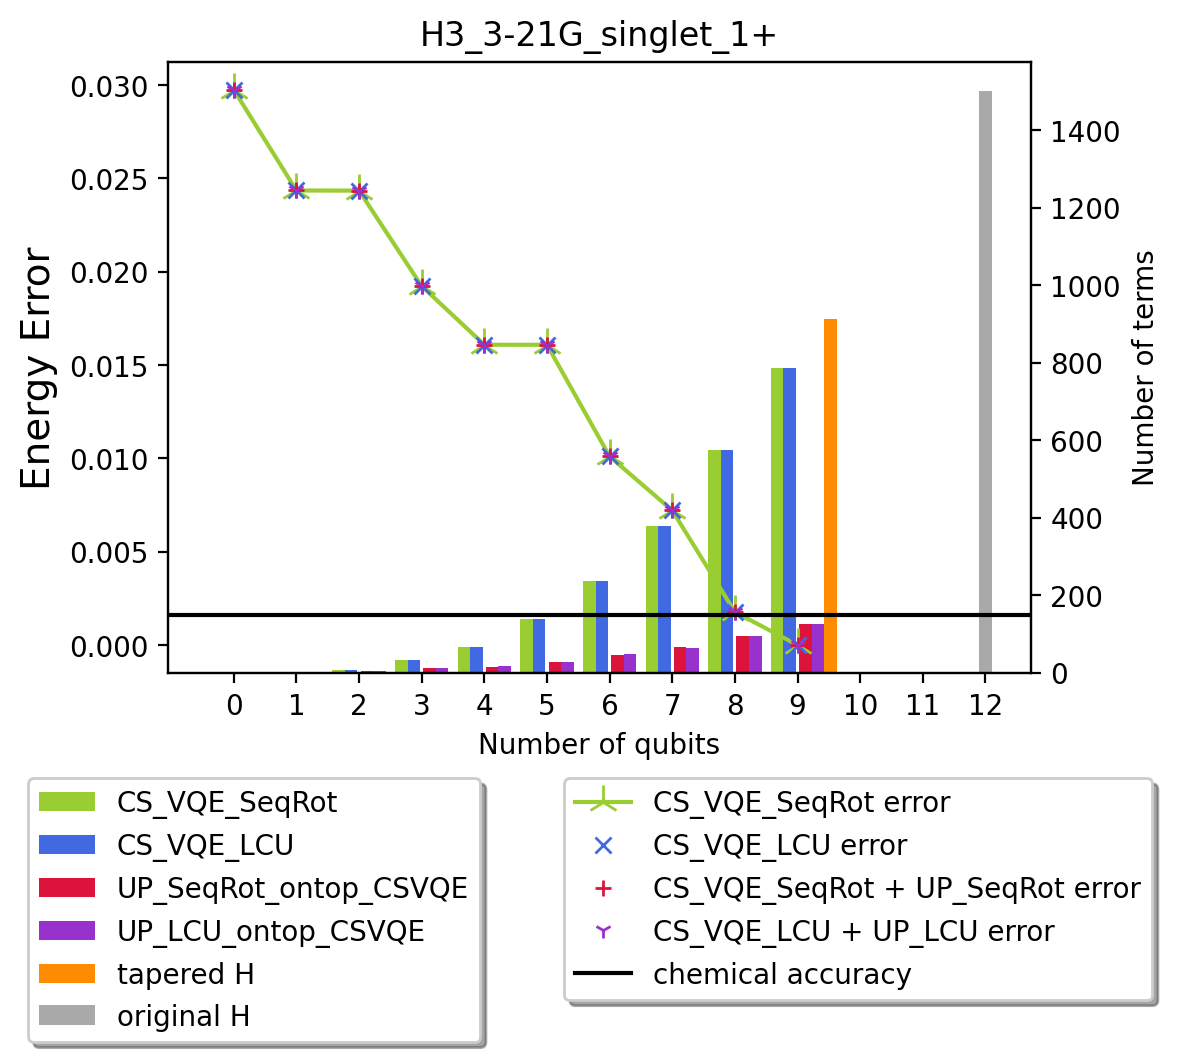

In [200]:
plot_n_terms_and_error(pre_tap_hamiltonians_relevent,
                       tapered_H_size_qubits, 
                       myriad_CS_VQE_LCU_results,
                       myriad_CS_VQE_SeqRot_results,
                       myriad_UP_LCU_on_CSVQE_LCU,
                       myriad_UP_SeqRot_on_CSVQE_SeqRot,
                        'H3_3-21G_singlet_1+',
                       dpi=200)

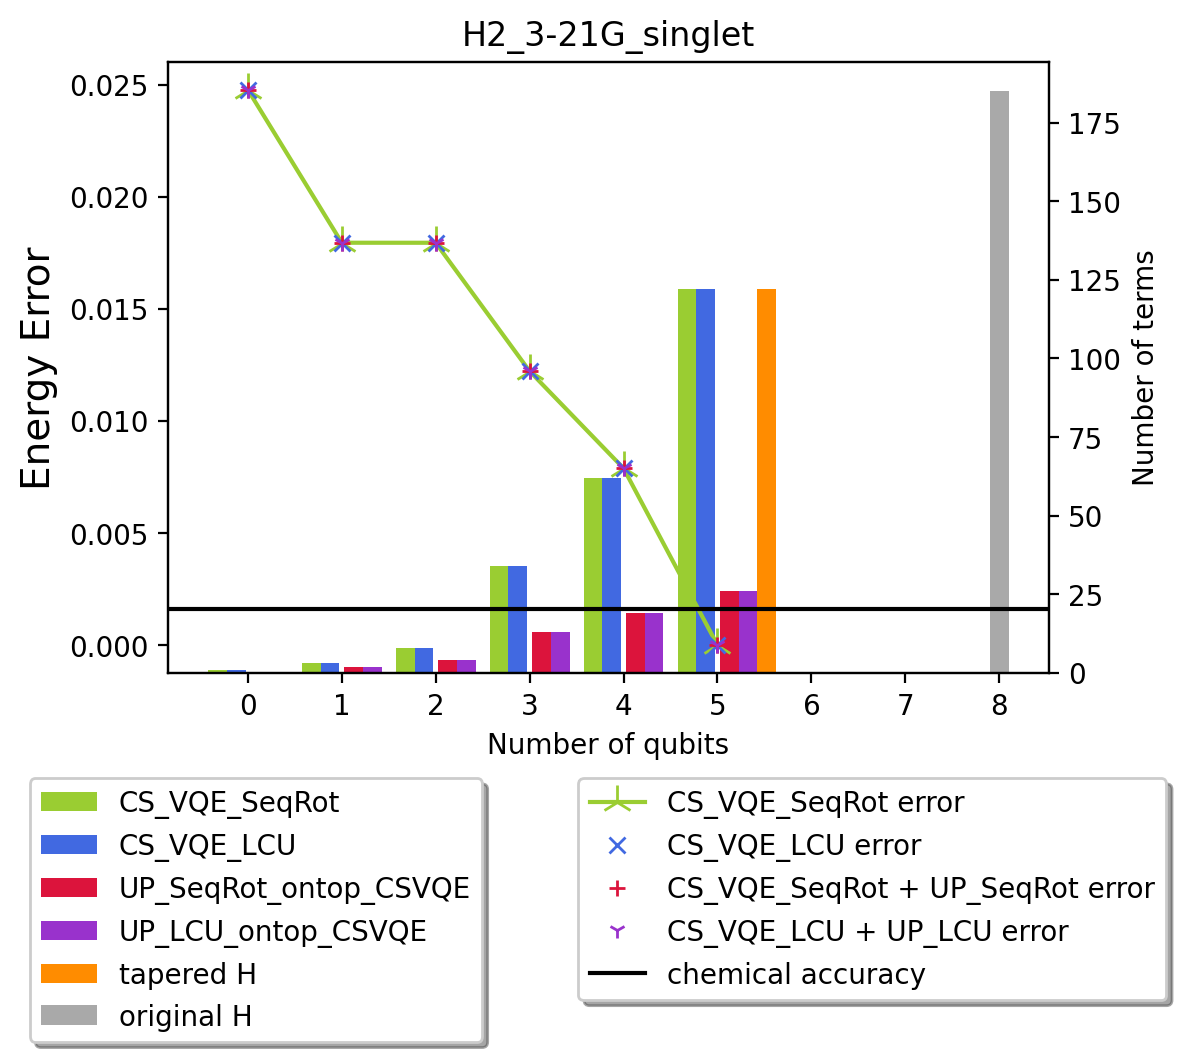

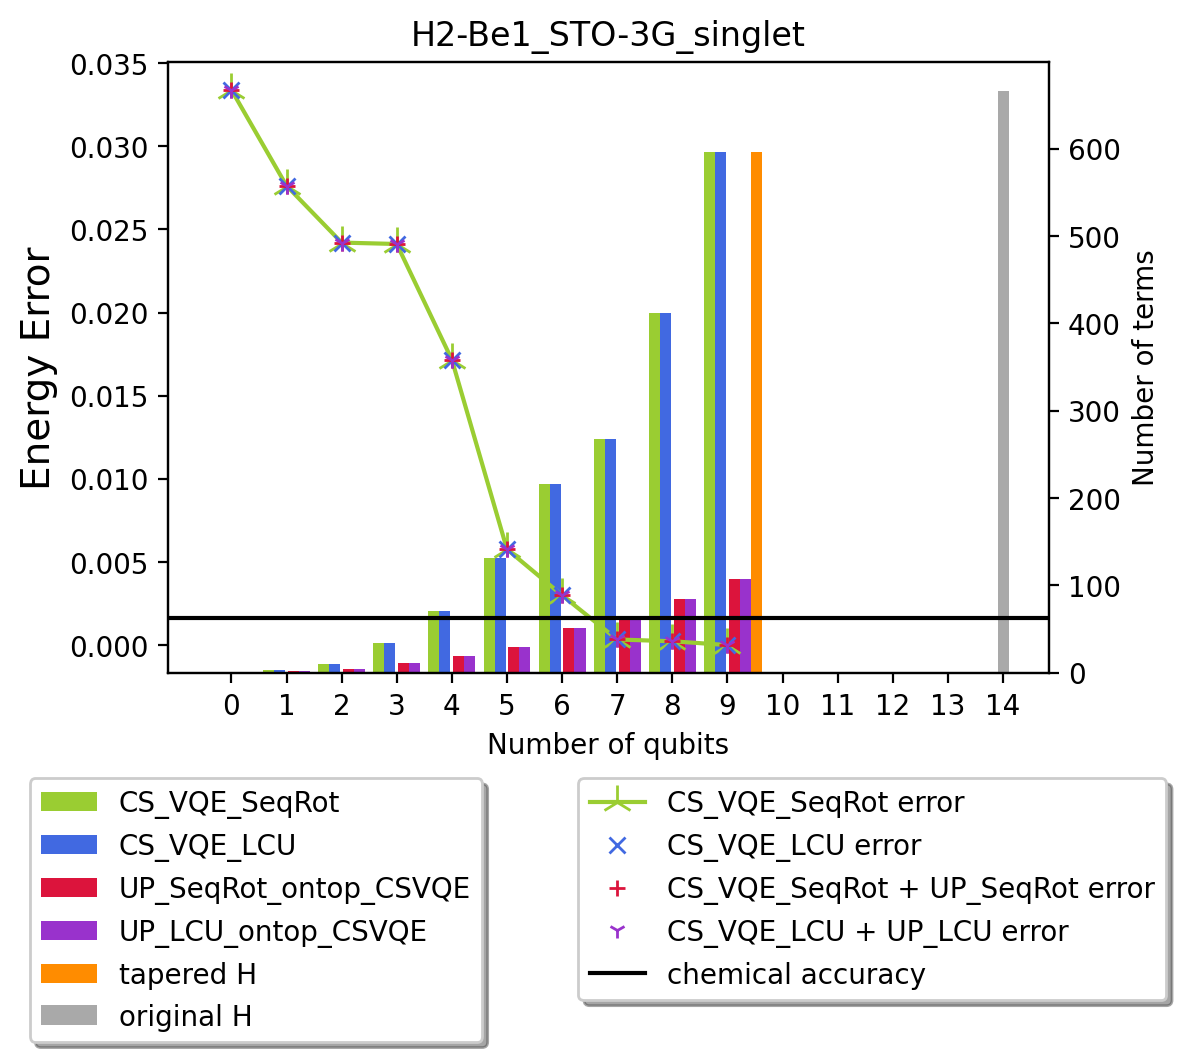

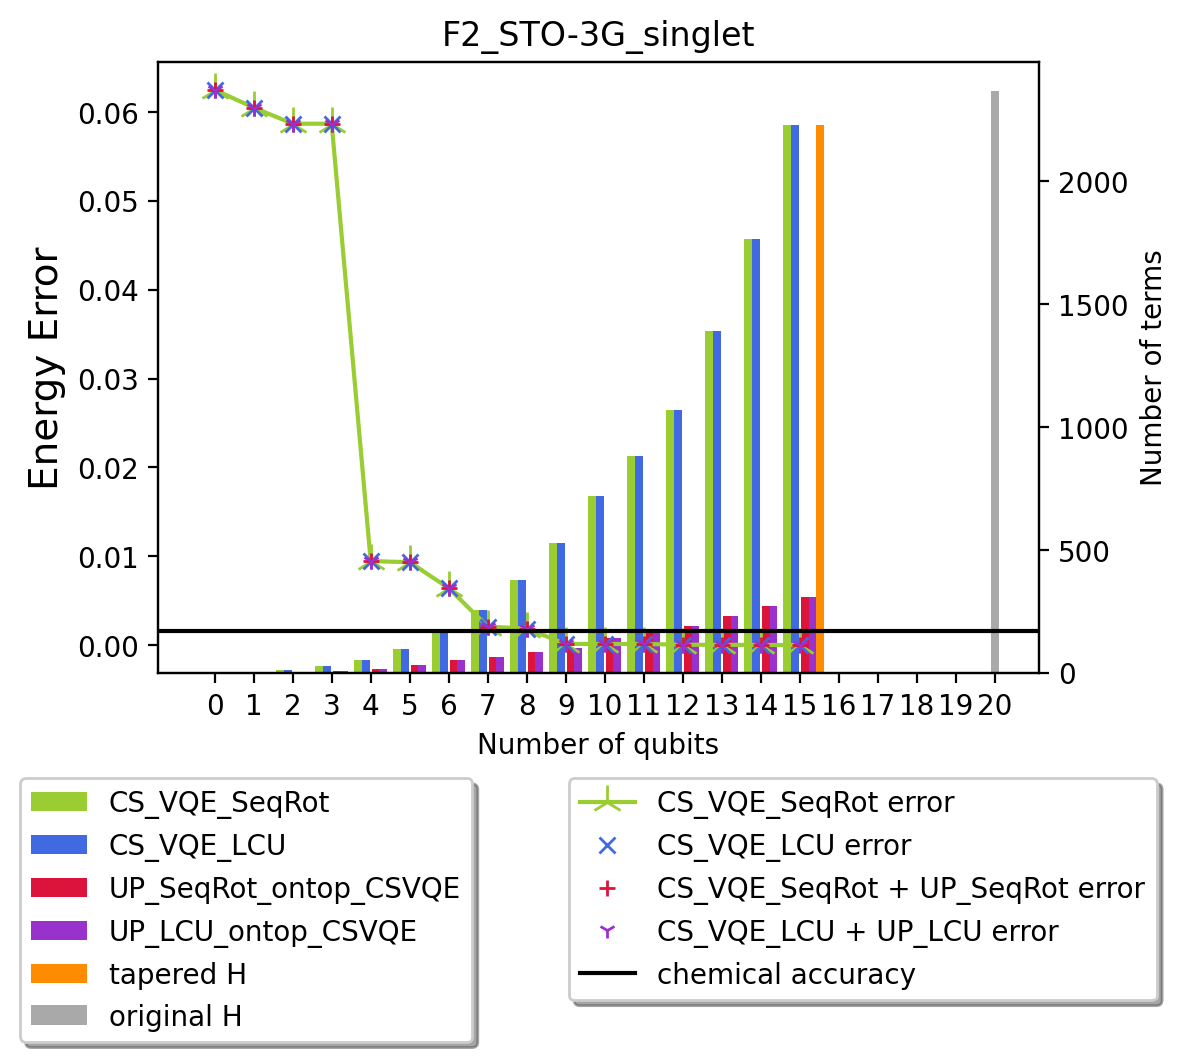

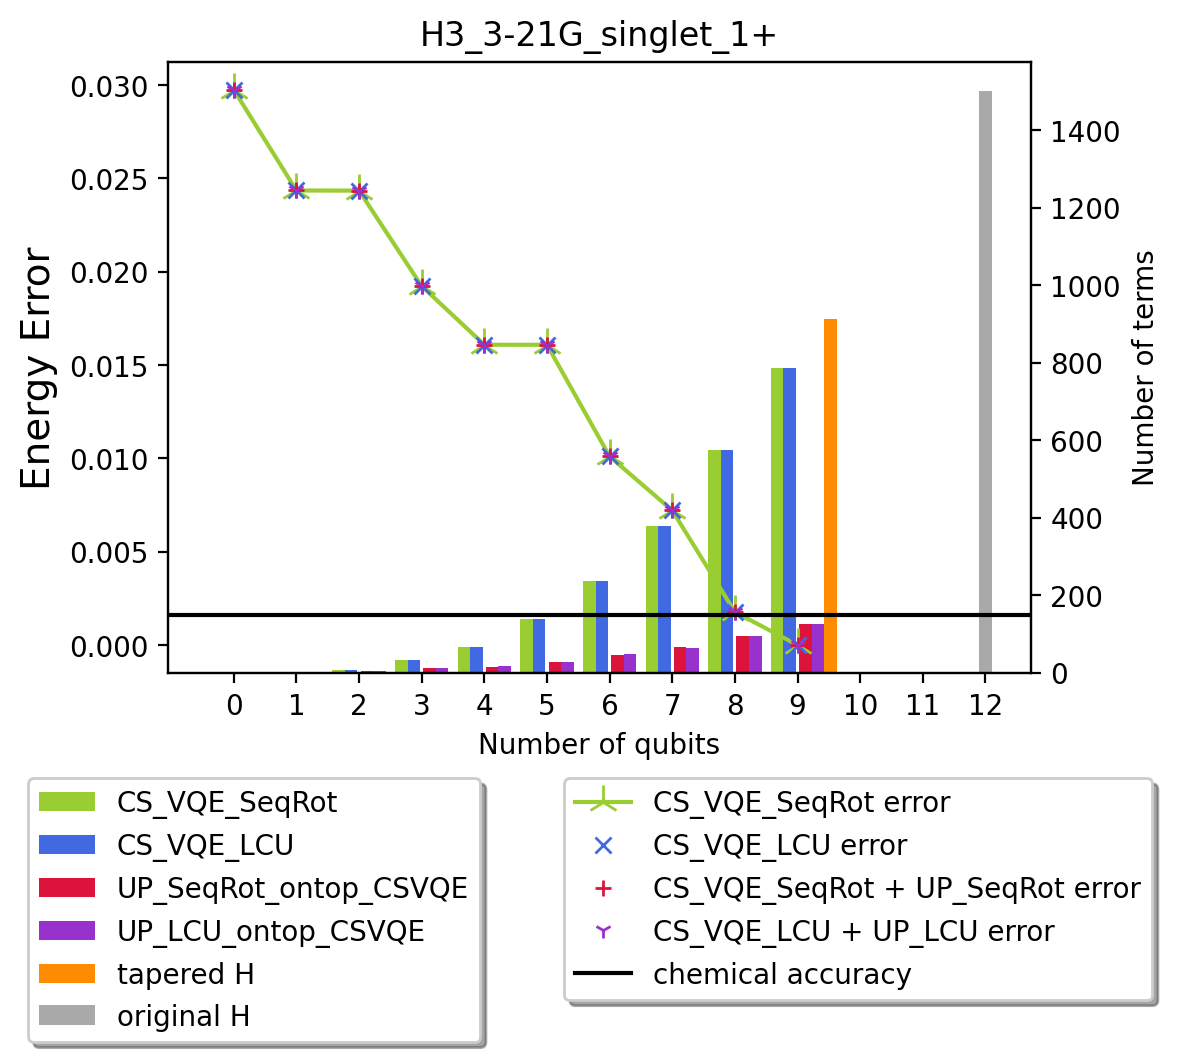

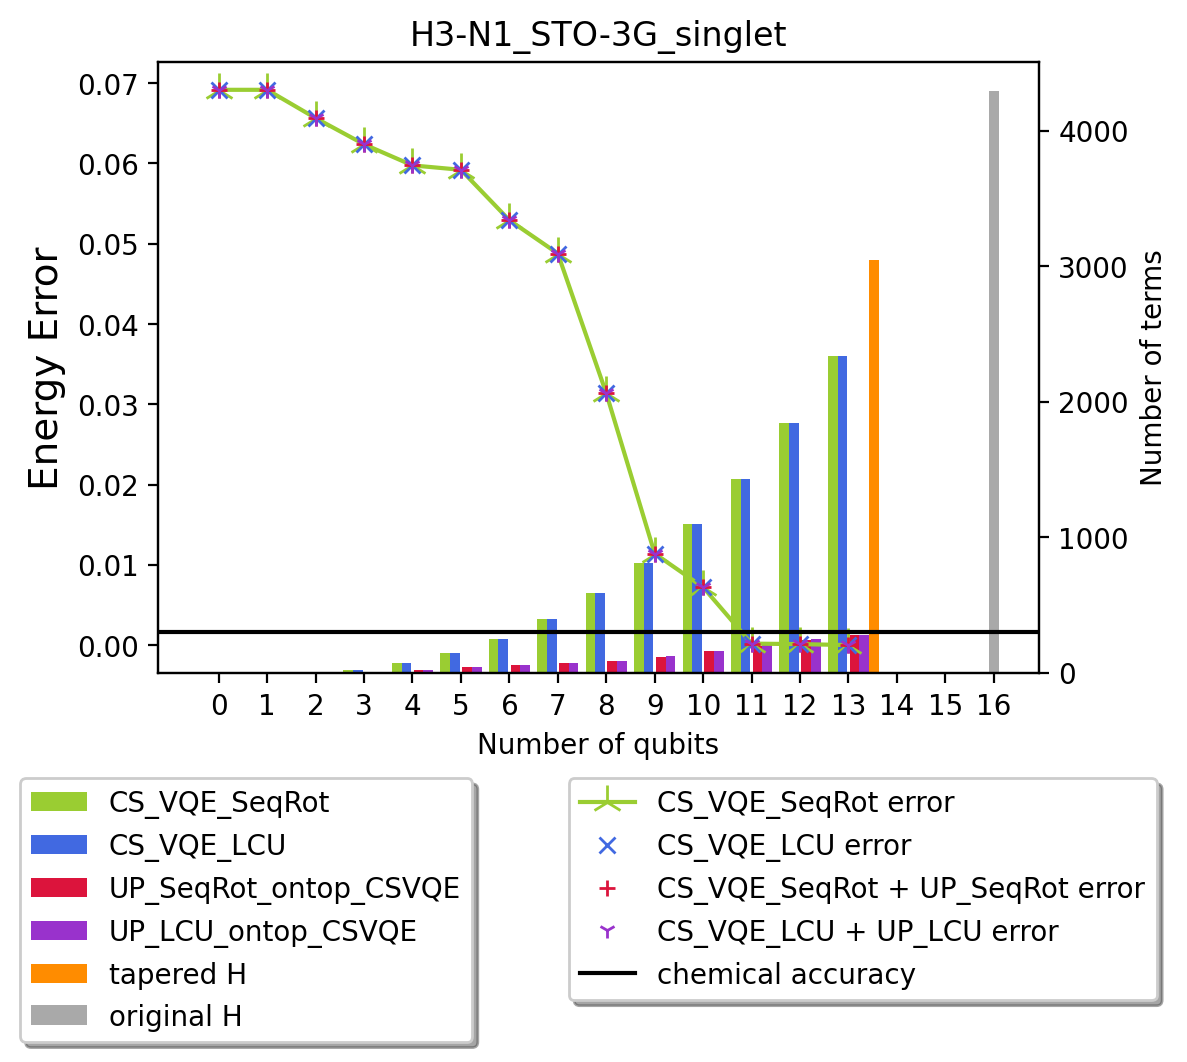

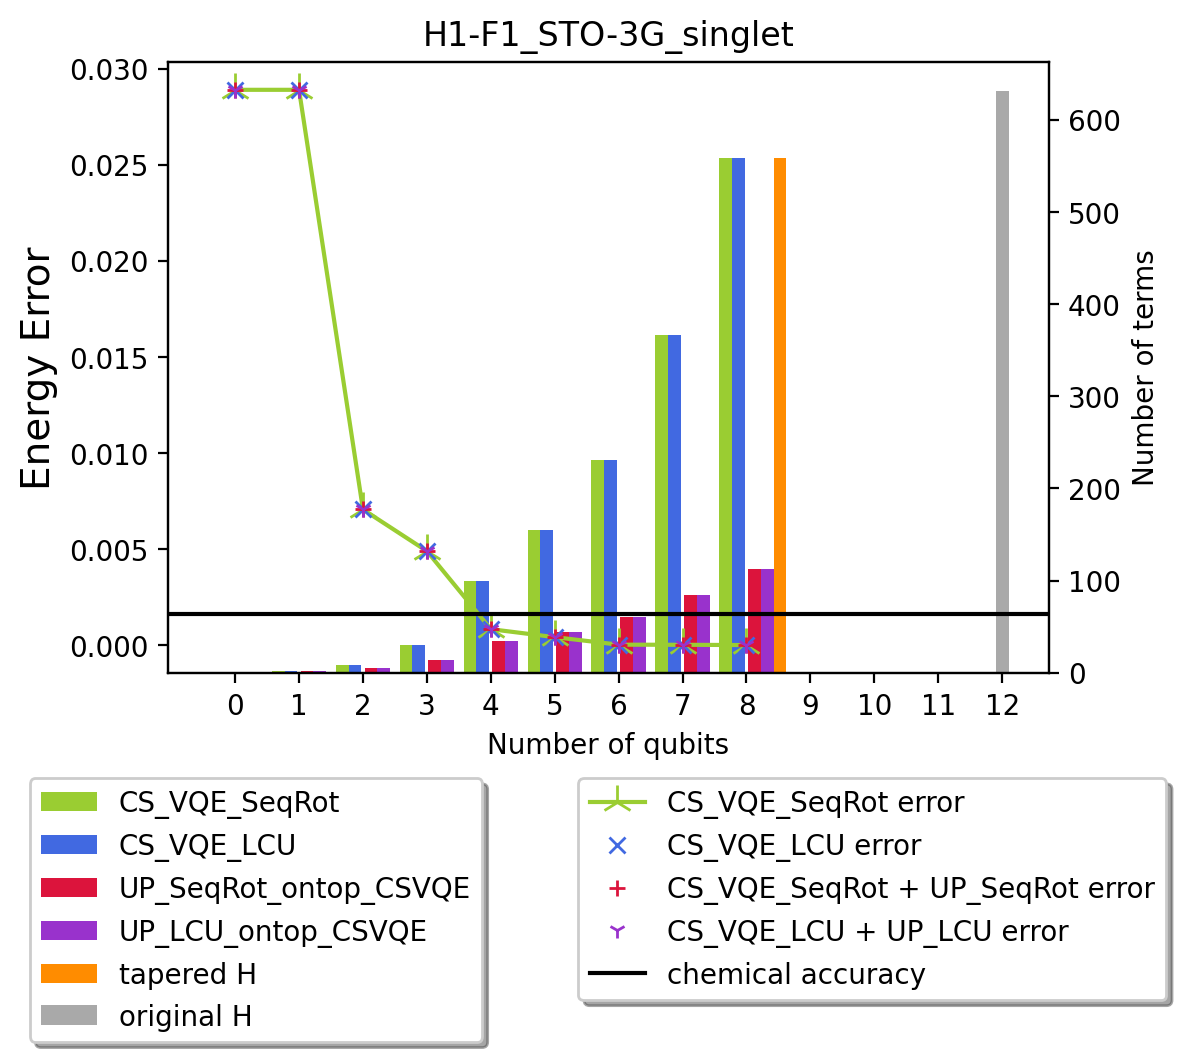

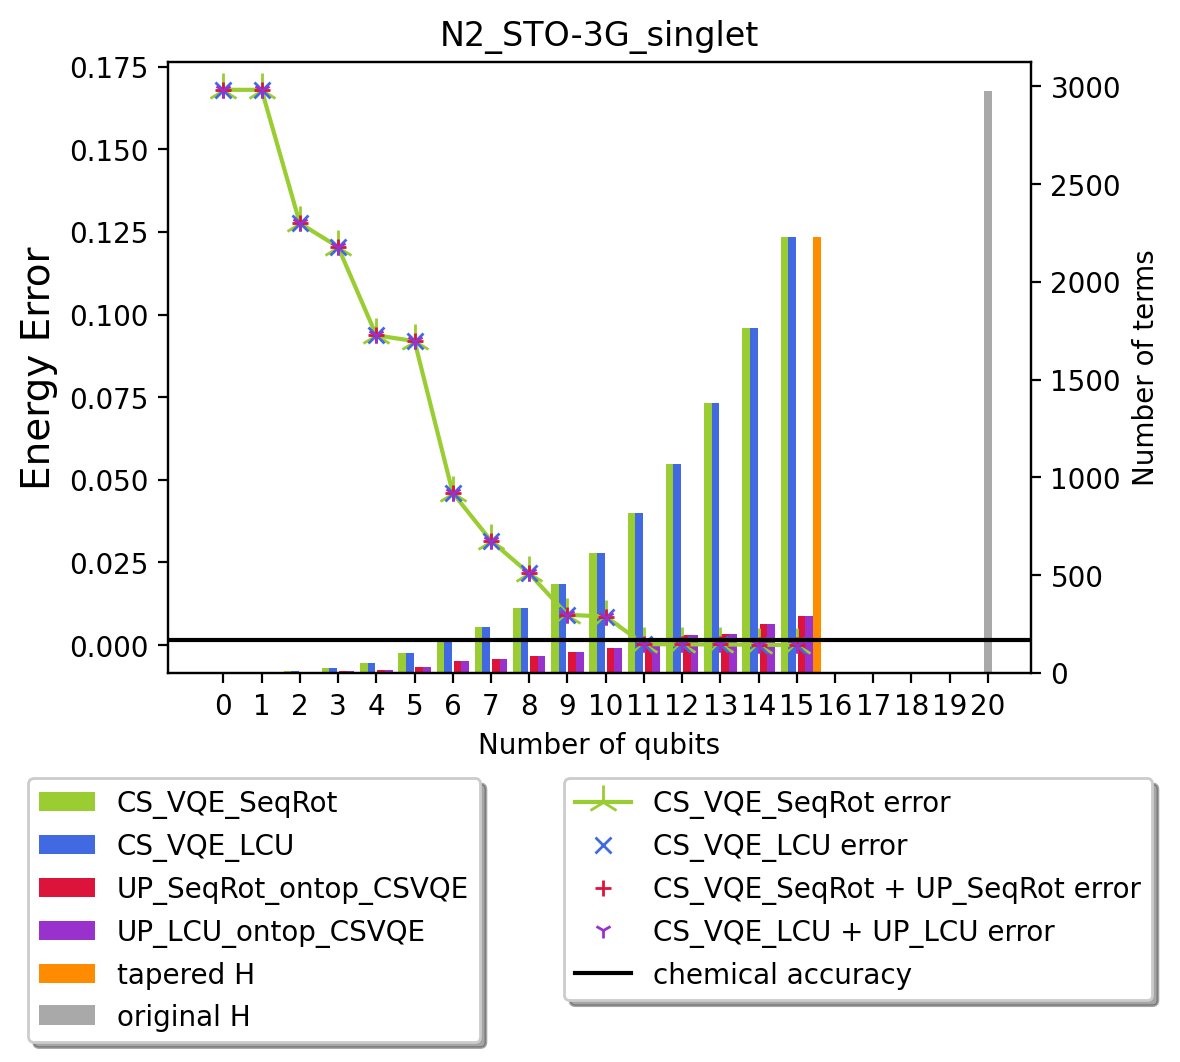

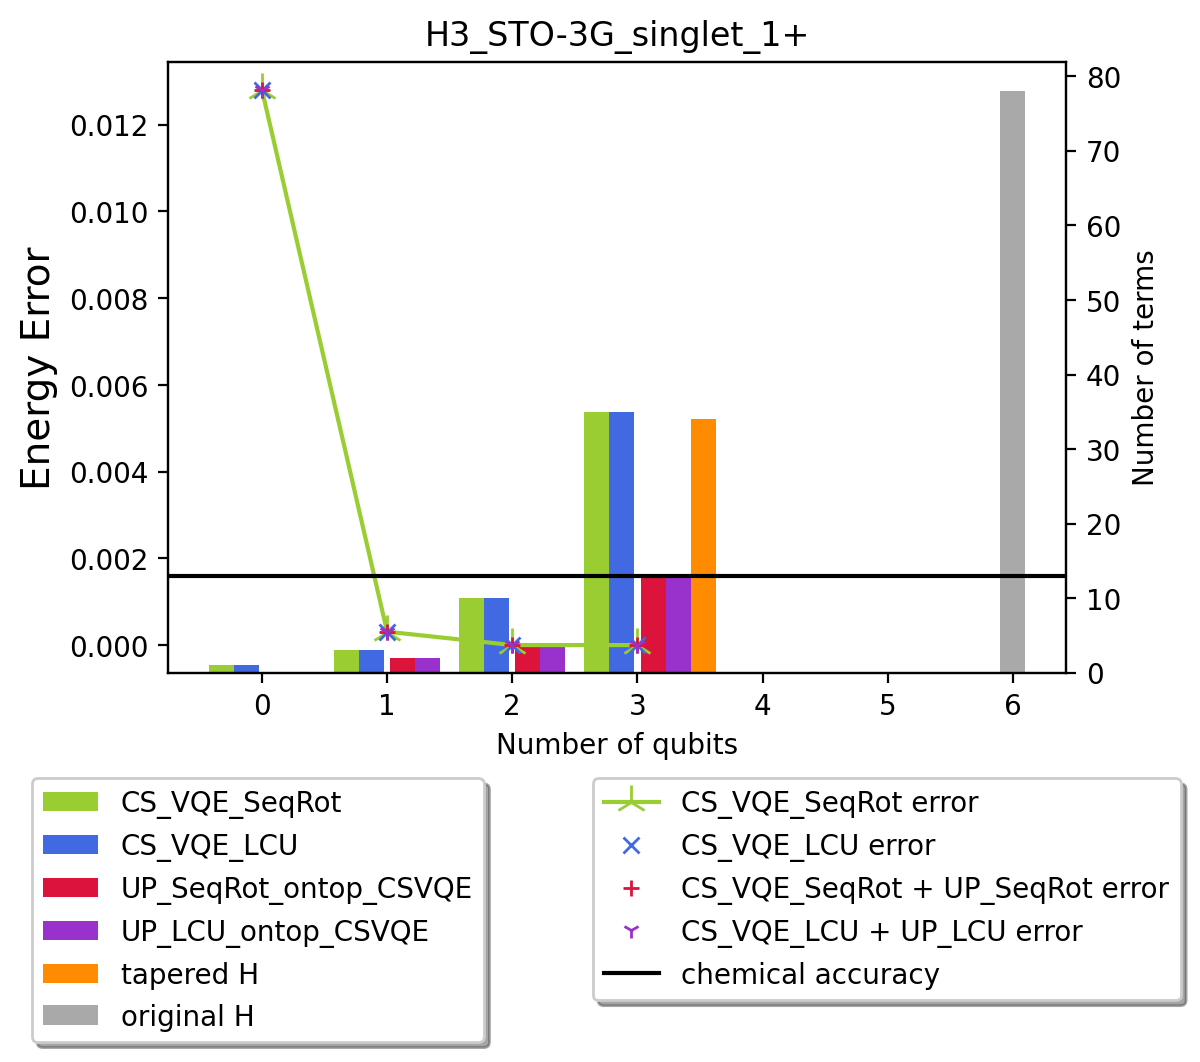

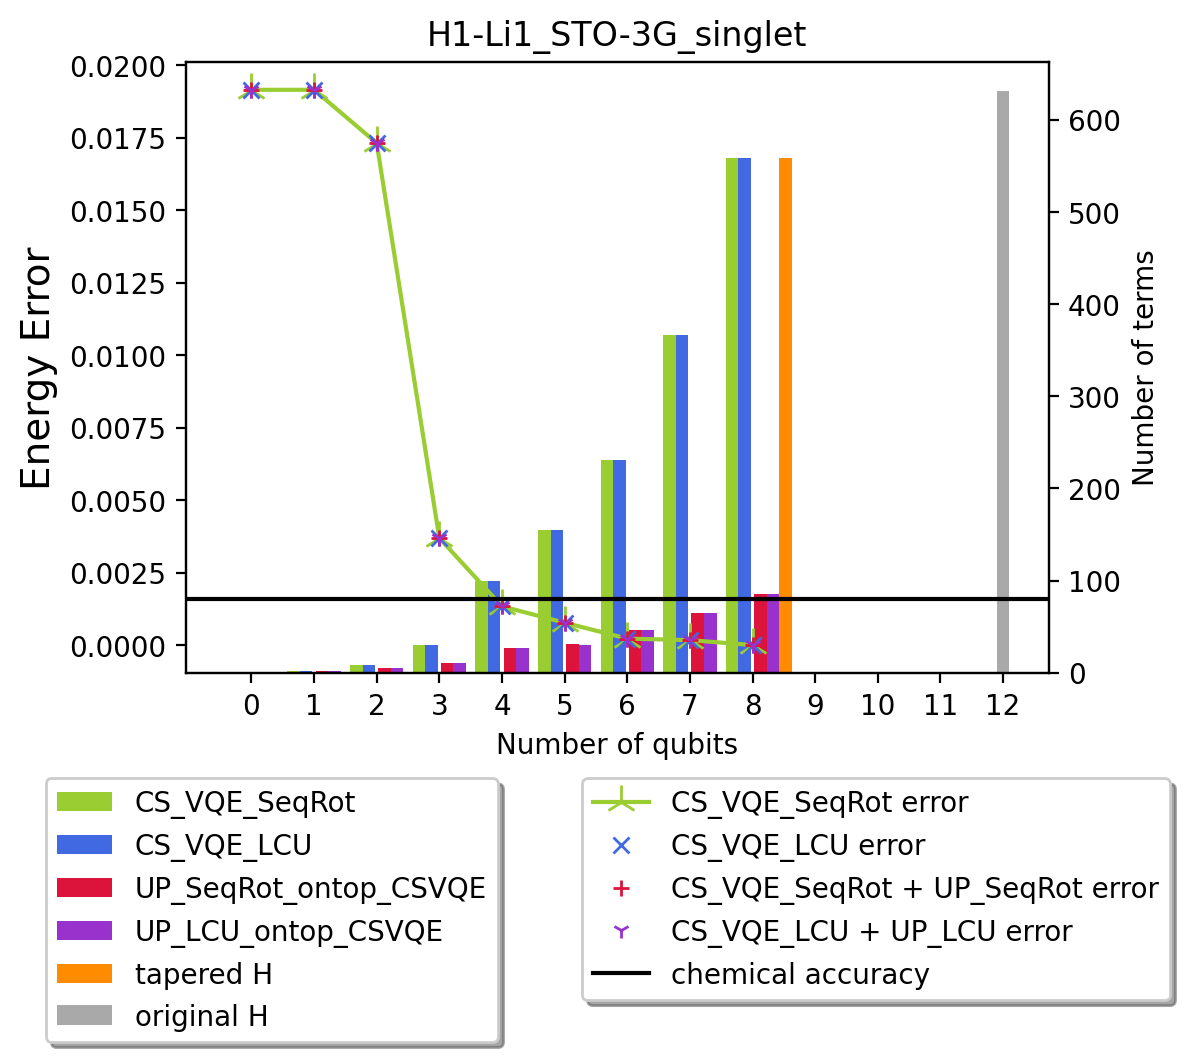

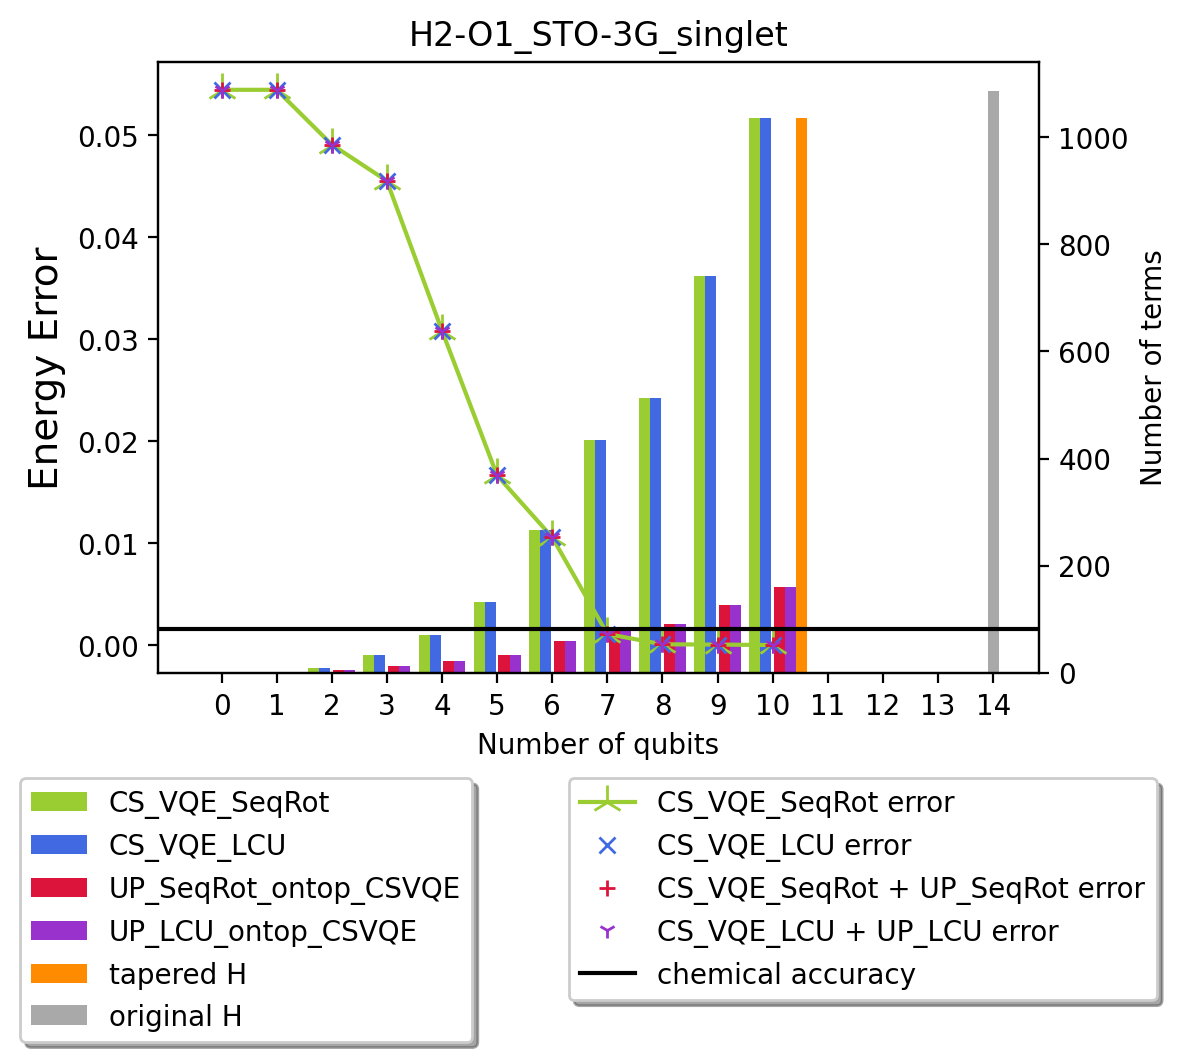

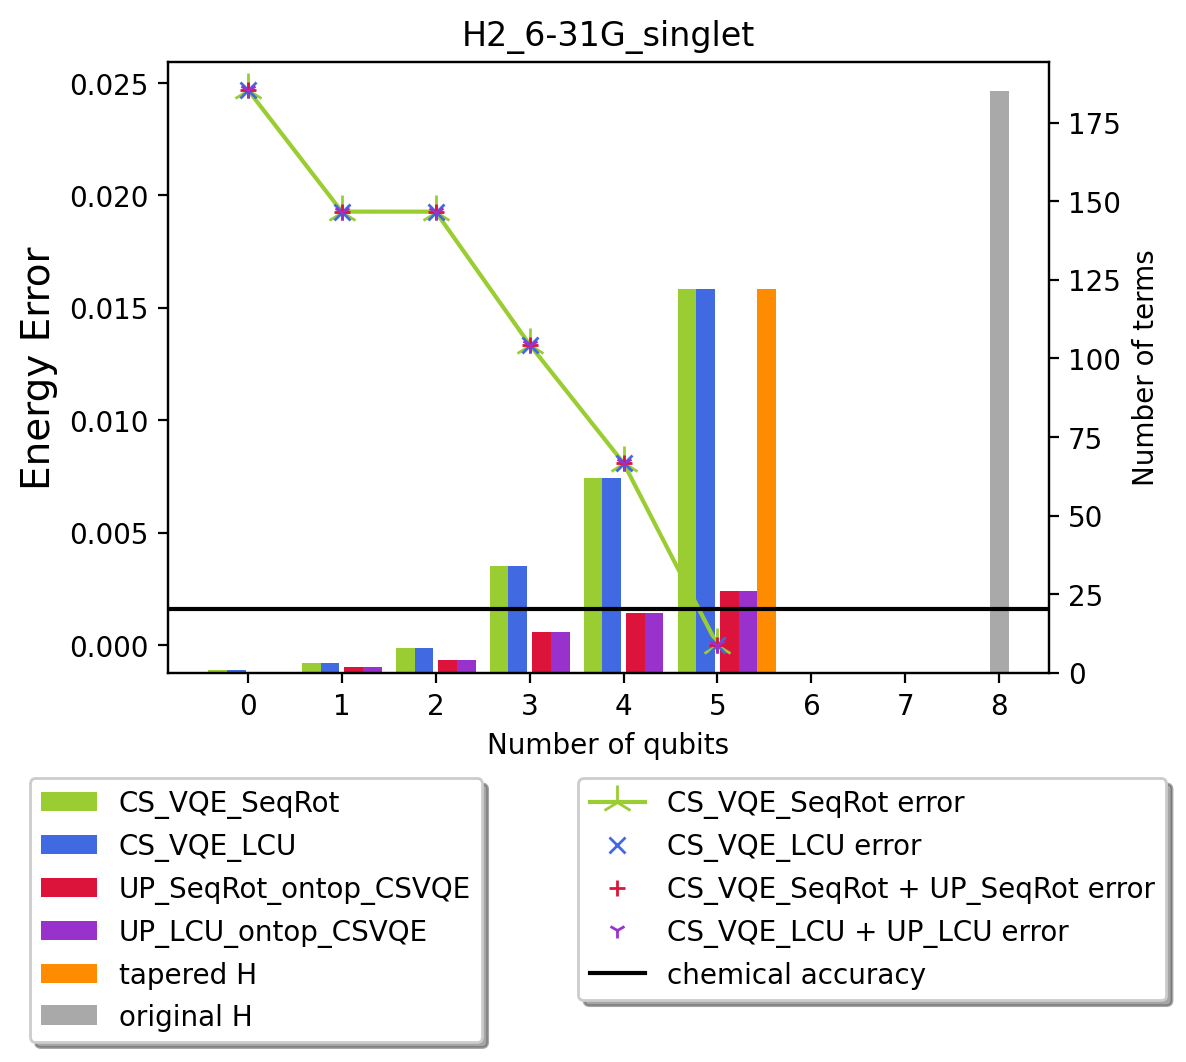

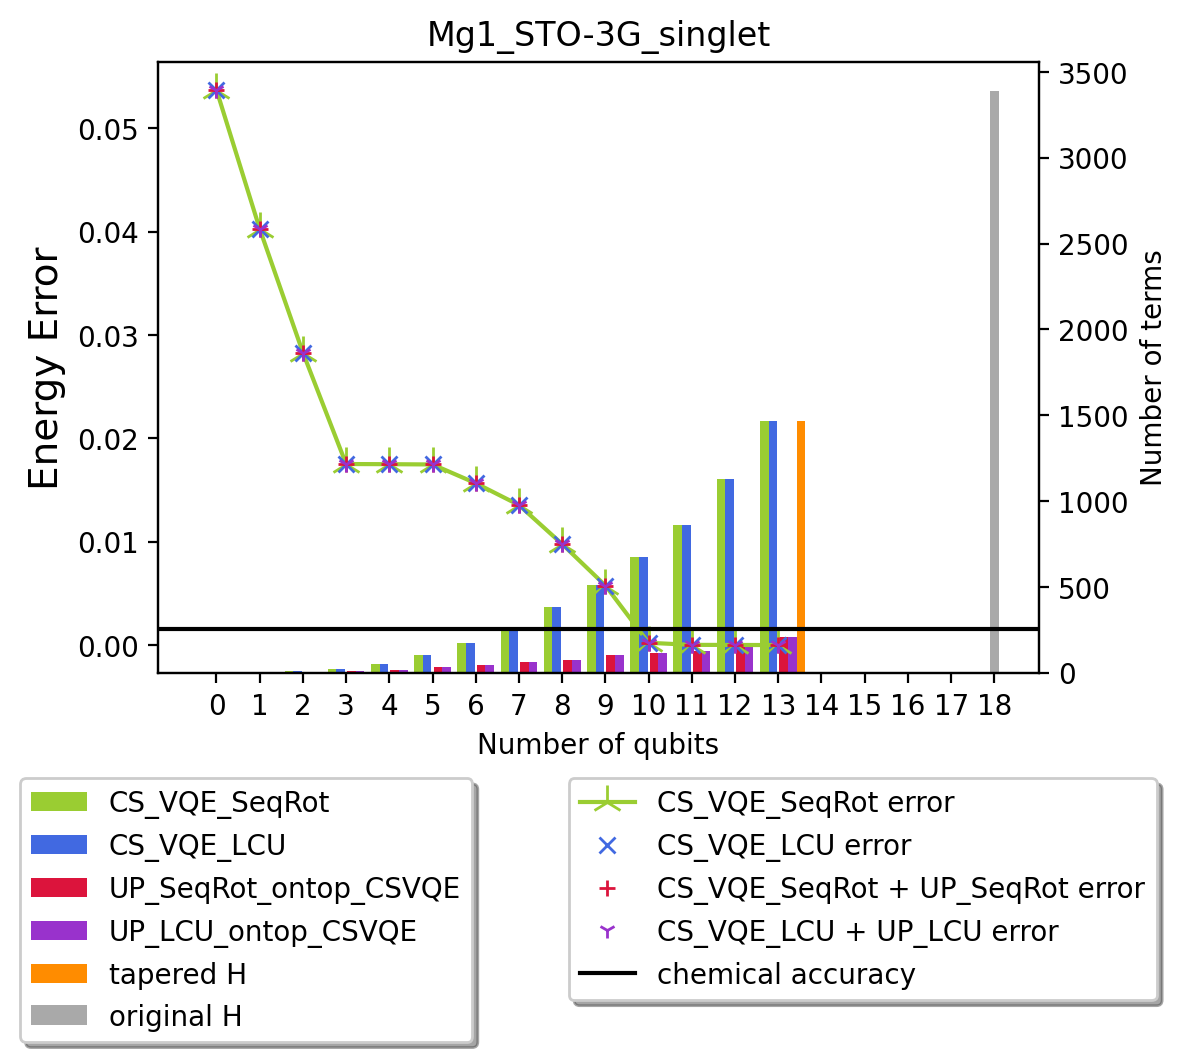

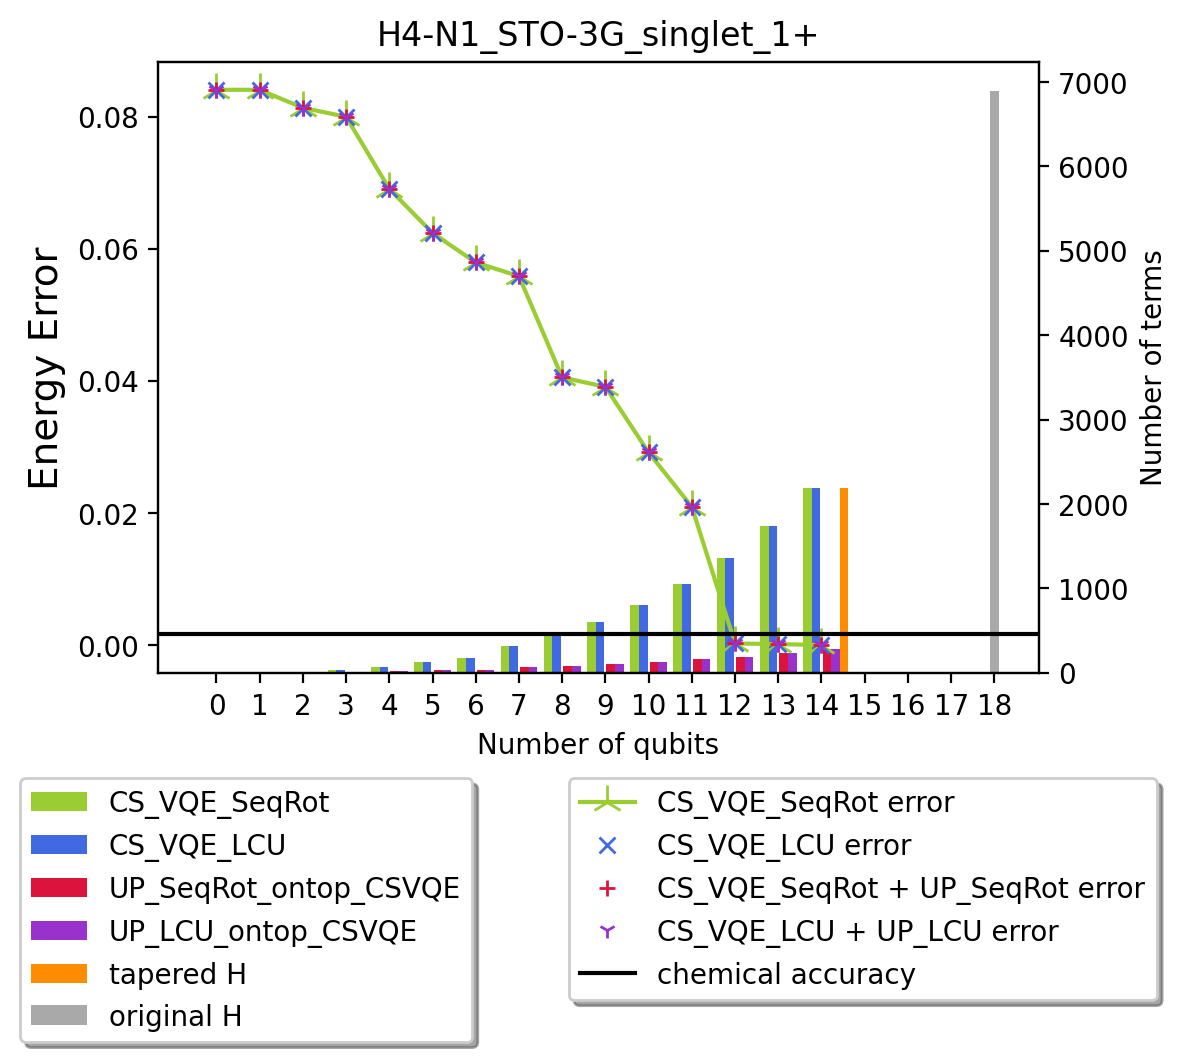

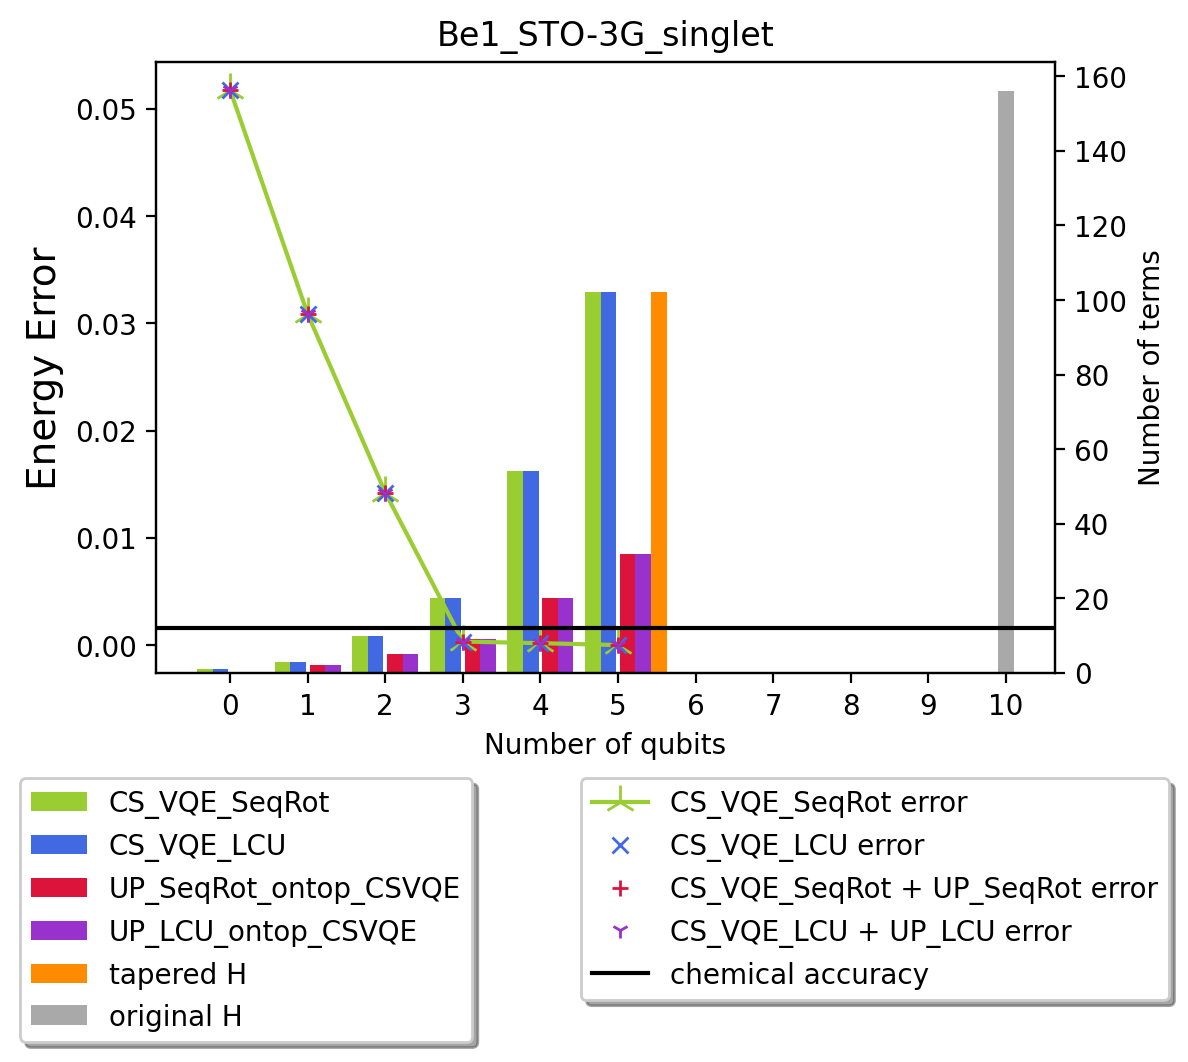

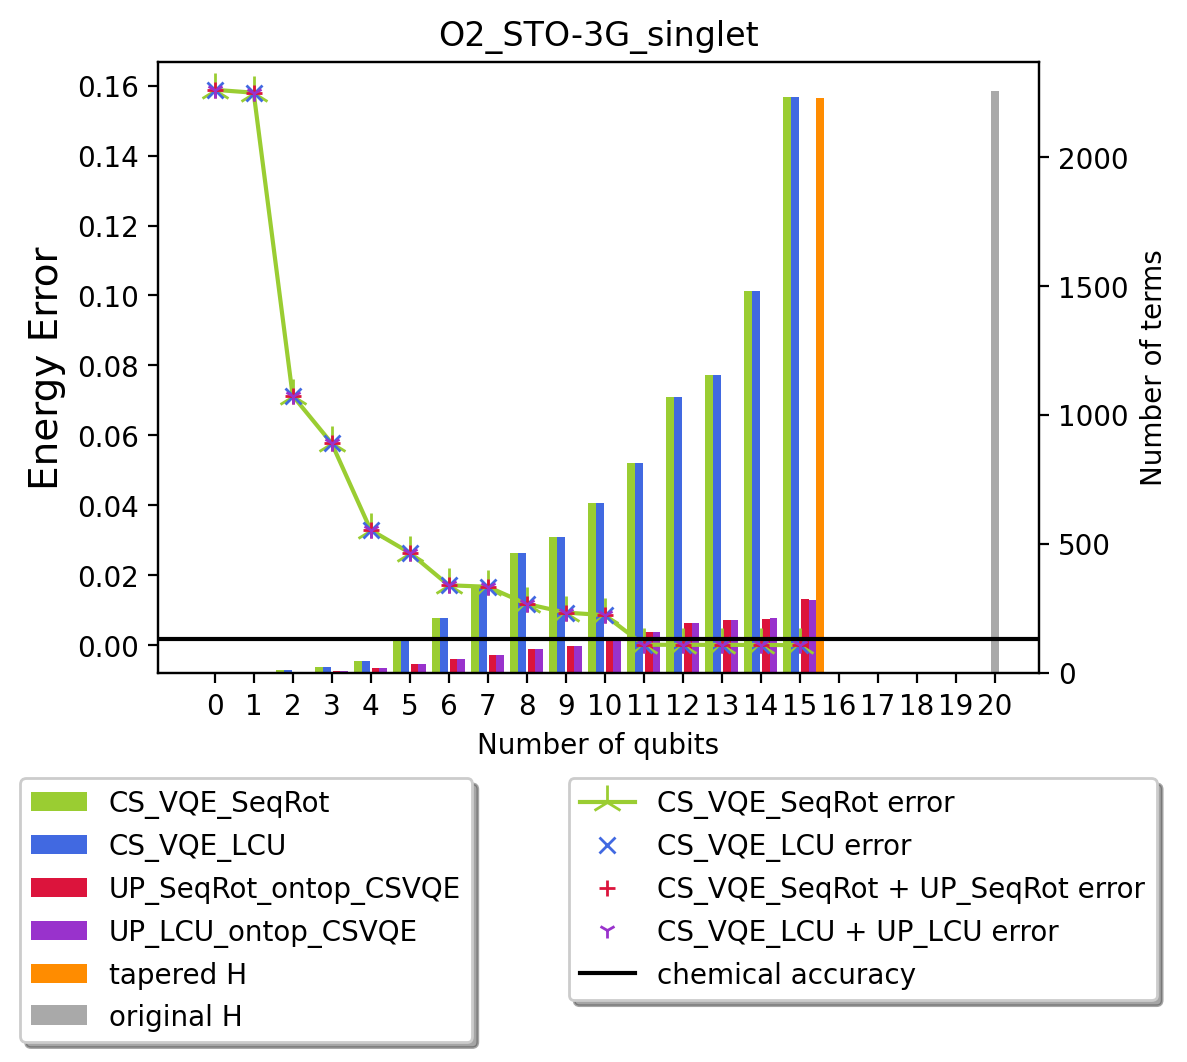

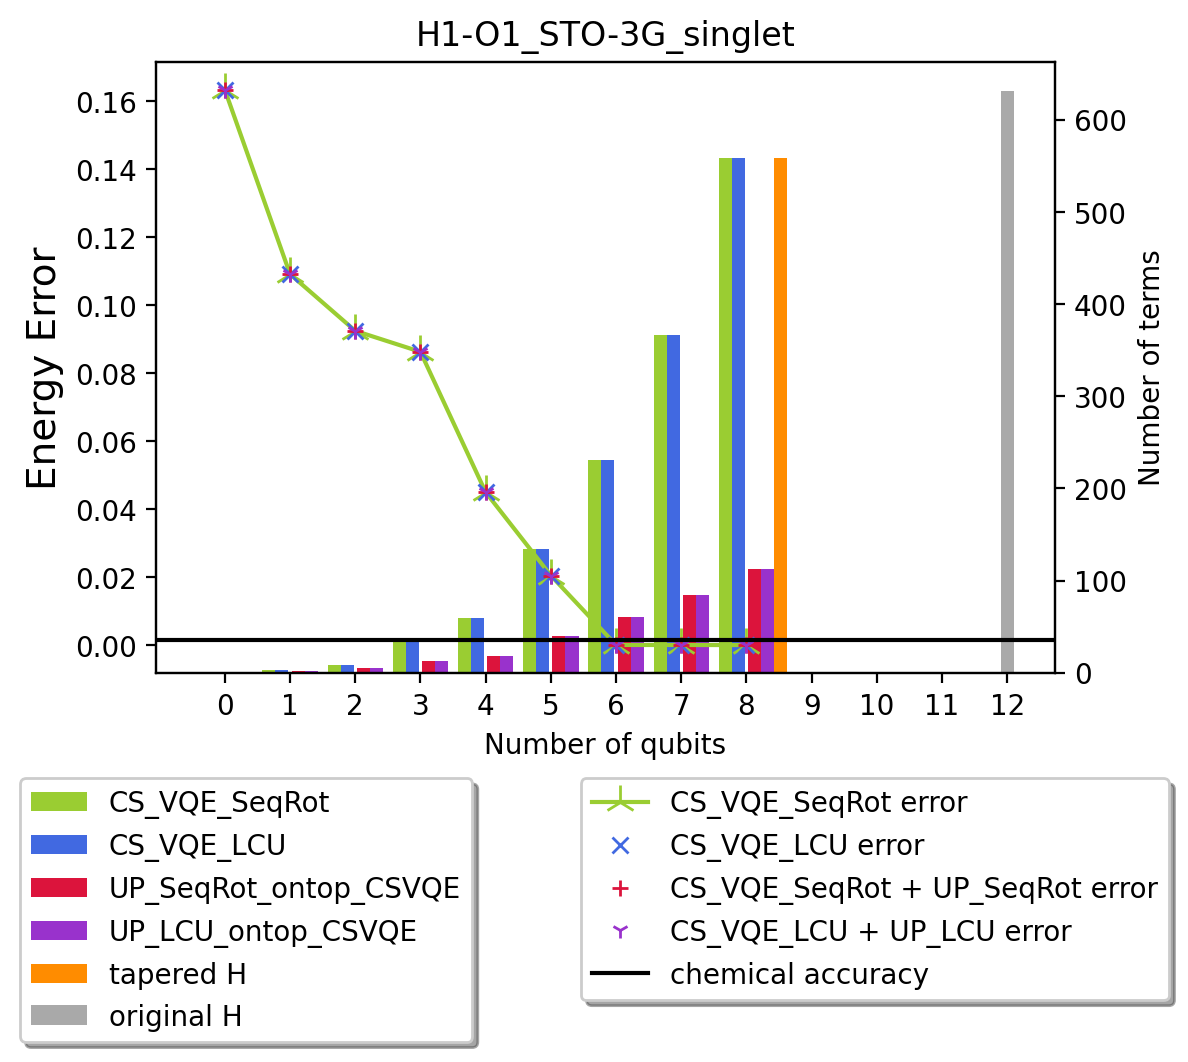

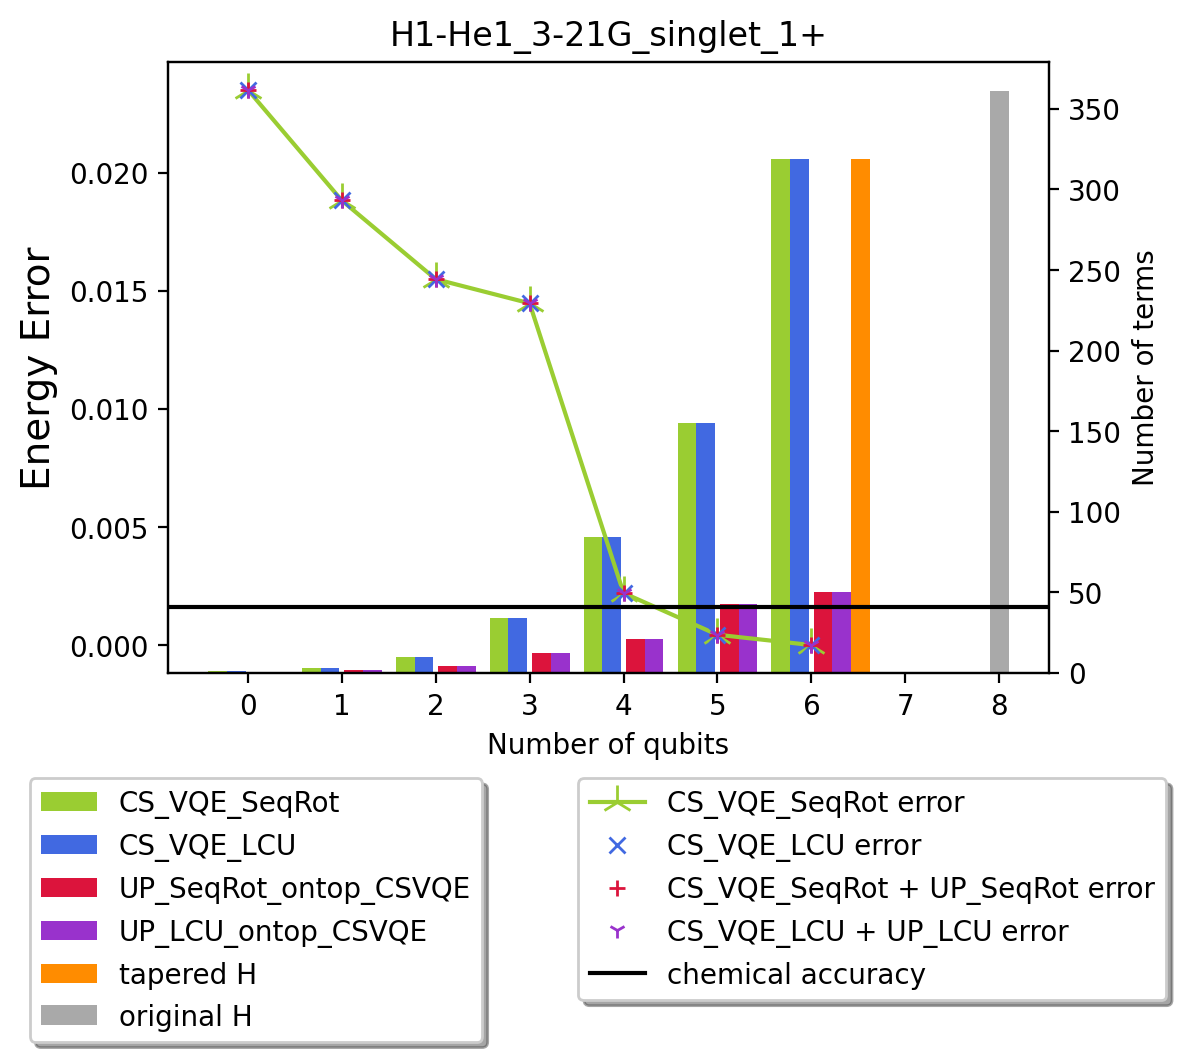

In [201]:
for molecule in myriad_UP_SeqRot_on_CSVQE_SeqRot.keys():
    plot_n_terms_and_error(pre_tap_hamiltonians_relevent,
                       tapered_H_size_qubits, 
                       myriad_CS_VQE_LCU_results,
                       myriad_CS_VQE_SeqRot_results,
                       myriad_UP_LCU_on_CSVQE_LCU,
                       myriad_UP_SeqRot_on_CSVQE_SeqRot,
                       molecule,
                       dpi=200)

In [29]:
1.6e-3

0.0016

In [30]:
import pandas as pd
from copy import deepcopy

In [202]:
data = {'molecule': [], 
        'No. qubits': [], 
        'No. terms CS-VQE LCU':[],
        'No. terms CS-VQE SeqRot':[],
        'No. terms CS-VQE LCU and LCU UP':[],
        'No. terms CS-VQE SeqRot and SeqRot UP':[],
        'Original No. qubits tapered H':[],
        'Original No. terms tapered H':[]
       }

for mol_name in myriad_UP_SeqRot_on_CSVQE_SeqRot.keys():
    
    True_gs_energy = myriad_CS_VQE_LCU_results[mol_name]['exp_conditions']['true_gs']
    
    # SeqRot UP ontop CSVQE
    for ind in sorted(myriad_UP_SeqRot_on_CSVQE_SeqRot[mol_name][mol_name].keys()): 
        UP_SeqRot_E = myriad_UP_SeqRot_on_CSVQE_SeqRot[mol_name][mol_name][ind]['E']
        if np.abs(True_gs_energy-UP_SeqRot_E)<=1.6e-3:
            SeqRot_UP_ind = deepcopy(ind)
            break

    # LCU UP ontop CSVQE
    for ind in sorted(myriad_UP_LCU_on_CSVQE_LCU[mol_name][mol_name].keys()): 
        UP_LCU_E = myriad_UP_LCU_on_CSVQE_LCU[mol_name][mol_name][ind]['E']
        if np.abs(True_gs_energy-UP_LCU_E)<=1.6e-3:
            LCU_UP_ind = deepcopy(ind)
            break
            
        
    # CSVQE only - LCU script A
    for ind in sorted([ind for key in myriad_CS_VQE_LCU_results[mol_name].keys() if isinstance(ind, int)]):
        CSVQE_LCU_E = myriad_CS_VQE_LCU_results[mol_name][ind]['E']
        if np.abs(True_gs_energy-CSVQE_LCU_E)<=1.6e-3:
            LCU_CSVQE_ind = deepcopy(ind)
            break
    
    # CSVQE only - SeqRot script A
    for ind in sorted([ind for key in myriad_CS_VQE_SeqRot_results[mol_name].keys() if isinstance(ind, int)]):
        CSVQE_SeqRot_E = myriad_CS_VQE_SeqRot_results[mol_name][ind]['E']
        if np.abs(True_gs_energy-CSVQE_SeqRot_E)<=1.6e-3:
            SeqRot_CSVQE_ind = deepcopy(ind)
            break
            
    if not (SeqRot_UP_ind==LCU_UP_ind==LCU_CSVQE_ind==SeqRot_CSVQE_ind):
        raise ValueError('different result for different methods! Something likely wrong')
        
    UP_SeqRot_terms = len(myriad_UP_SeqRot_on_CSVQE_SeqRot[mol_name][mol_name][SeqRot_UP_ind]['AC_sets'])
    UP_LCU_terms = len(myriad_UP_LCU_on_CSVQE_LCU[mol_name][mol_name][LCU_UP_ind]['AC_sets'])
    CSVQE_LCU_terms = len(myriad_CS_VQE_LCU_results[mol_name][LCU_CSVQE_ind]['H'])
    CSVQE_SeqRot_terms = len(myriad_CS_VQE_SeqRot_results[mol_name][SeqRot_CSVQE_ind]['H'])
    n_qubits = len(list(myriad_CS_VQE_LCU_results[mol_name][LCU_CSVQE_ind]['H'].keys())[0])
    
    tapered_n_qbits = tapered_H_size_qubits[mol_name]['n_qubits']
    tapered_n_terms = tapered_H_size_qubits[mol_name]['n_terms']
    
    data['molecule'].append(mol_name)
    data['No. qubits'].append(n_qubits)
    data['No. terms CS-VQE LCU'].append(CSVQE_LCU_terms)
    data['No. terms CS-VQE SeqRot'].append(CSVQE_SeqRot_terms)
    data['No. terms CS-VQE LCU and LCU UP'].append(UP_LCU_terms)
    data['No. terms CS-VQE SeqRot and SeqRot UP'].append(UP_SeqRot_terms)
    data['Original No. qubits tapered H'].append(tapered_n_qbits)
    data['Original No. terms tapered H'].append(tapered_n_terms)
    

In [32]:
# mol_name = 'H2-O1_STO-3G_singlet'
# ind=7

# CSVQE_LCU_E = myriad_CS_VQE_LCU_results[mol_name][ind]['E']
# True_gs_energy = myriad_CS_VQE_LCU_results[mol_name]['exp_conditions']['true_gs']
# np.abs(CSVQE_LCU_E-True_gs_energy)

# Results

- number of qubits required to acheive chemical accuracy
- with number of terms in Hamiltonian
    - either with only CS-VQE applied
    - or with CS-VQE applied then unitary partitioning ontop

In [203]:
df = pd.DataFrame(data=data)
df

,molecule,No. qubits,No. terms CS-VQE LCU,No. terms CS-VQE SeqRot,No. terms CS-VQE LCU and LCU UP,No. terms CS-VQE SeqRot and SeqRot UP,Original No. qubits tapered H,Original No. terms tapered H
0,H2_3-21G_singlet,5,122,122,26,26,5,122
1,H2-Be1_STO-3G_singlet,7,268,268,61,61,9,596
2,F2_STO-3G_singlet,9,527,527,99,99,15,2229
3,H3_3-21G_singlet_1+,9,786,786,127,127,9,914
4,H3-N1_STO-3G_singlet,11,1429,1429,202,197,13,3048
5,H1-F1_STO-3G_singlet,4,100,100,34,34,8,558
6,N2_STO-3G_singlet,11,815,815,153,153,15,2229
7,H3_STO-3G_singlet_1+,1,3,3,2,2,3,34
8,H1-Li1_STO-3G_singlet,4,100,100,27,27,8,558
9,H2-O1_STO-3G_singlet,7,435,435,82,82,10,1035


In [37]:
myriad_UP_SeqRot_on_CSVQE_SeqRot['H3-N1_STO-3G_singlet']['H3-N1_STO-3G_singlet'].keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])

In [60]:
myriad_CS_VQE_LCU_results['H3-N1_STO-3G_singlet']['exp_conditions']['removal_order']

[9, 8, 12, 5, 2, 7, 6, 1, 0, 4, 3, 10, 11]

In [98]:
myriad_CS_VQE_LCU_results['H3-N1_STO-3G_singlet']['exp_conditions']['removal_order']

[9, 8, 12, 5, 2, 7, 6, 1, 0, 4, 3, 10, 11]

In [69]:
myriad_CS_VQE_SeqRot_results['H3-N1_STO-3G_singlet']['exp_conditions']['model_CSVQE'][1]

['XZZZZXZIIIIII', 'IIIIIZIIIIIII']

In [109]:
len(myriad_CS_VQE_LCU_results['H3-N1_STO-3G_singlet'][10]['H'])

1227

In [108]:
len(myriad_CS_VQE_SeqRot_results['H3-N1_STO-3G_singlet'][10]['H'])

1223

In [34]:
myriad_UP_SeqRot_on_CSVQE_SeqRot['H1-He1_3-21G_singlet_1+']['H1-He1_3-21G_singlet_1+'][1]['AC_sets']

{0: [-3.0935343311313326 []],
 1: [1.1421456535807015 [Z0], -0.10354696914008185 [X0]]}

In [76]:
myriad_CS_VQE_SeqRot_results['H3-N1_STO-3G_singlet']['exp_conditions'].keys()
model = myriad_CS_VQE_SeqRot_results['H3-N1_STO-3G_singlet']['exp_conditions']['model_CSVQE']
fn_form =  myriad_CS_VQE_SeqRot_results['H3-N1_STO-3G_singlet']['exp_conditions']['fn_form_CSVQE']
ground_state_params = myriad_CS_VQE_SeqRot_results['H3-N1_STO-3G_singlet']['exp_conditions']['gstate_noncon']

In [77]:
Rotations_list, diagonalized_generators_GuA, eigen_vals_nonC_ground_state_GuA_ops = diagonalize_epistemic(model,
                                                                                                            fn_form,
                                                                                                            ground_state_params)

In [112]:
diagonalized_generators_GuA[-1]

'IIIIIZIIIIIII'

In [171]:
HH1 = conv_scr.Get_Openfermion_Hamiltonian(myriad_CS_VQE_LCU_results['H3-N1_STO-3G_singlet'][10]['H'])
HH2 = conv_scr.Get_Openfermion_Hamiltonian(myriad_CS_VQE_SeqRot_results['H3-N1_STO-3G_singlet'][10]['H'])

HH1_mat = qubit_operator_sparse(HH1)
HH2_mat = qubit_operator_sparse(HH2)

In [172]:
from quchem.Misc_functions.Misc_functions import sparse_allclose
sparse_allclose(HH1_mat, HH2_mat)

False

In [173]:
x, y = np.where(HH1_mat.todense()!= HH2_mat.todense())

In [128]:
HH1_mat[0,1]

(3.469446951953614e-18+0j)

In [189]:
Threshold = 1e-7
newH1 = {P: coeff for P, coeff in myriad_CS_VQE_LCU_results['H3-N1_STO-3G_singlet'][9]['H'].items() if np.abs(coeff)>Threshold}
newH2 = {P: coeff for P, coeff in myriad_CS_VQE_SeqRot_results['H3-N1_STO-3G_singlet'][9]['H'].items() if np.abs(coeff)>Threshold}

In [190]:
newH1.keys() == newH2.keys()

True

In [191]:
HH1 = conv_scr.Get_Openfermion_Hamiltonian(newH1)
HH2 = conv_scr.Get_Openfermion_Hamiltonian(newH2)

HH1_mat = qubit_operator_sparse(HH1)
HH2_mat = qubit_operator_sparse(HH2)
sparse_allclose(HH1_mat, HH2_mat)

True

In [169]:
x, y = np.where(HH1_mat.todense()!= HH2_mat.todense())

In [174]:
for x1, y1 in zip(x,y):
    if not np.isclose(HH1_mat[x1, y1], HH2_mat[x1, y1]):
        print(HH1_mat[x1, y1]-HH2_mat[x1, y1])

(2.108877562738959e-08+0j)
(2.1088775628034738e-08+0j)
(-2.1088774597522596e-08+0j)
(2.108877459691718e-08+0j)
(2.108877562363681e-08+0j)
(-2.108877458980275e-08+0j)
(2.1088775632593787e-08+0j)
(2.108877460767905e-08+0j)
(-2.1088774599005433e-08+0j)
(-2.1088775630827618e-08+0j)
(2.108877460804264e-08+0j)
(-2.108877562509437e-08+0j)
(-2.108877461201586e-08+0j)
(2.108877460681169e-08+0j)
(-2.1088775621373036e-08+0j)
(-2.1088775624227007e-08+0j)
(-2.108877359377982e-08+0j)
(-2.1088773592952214e-08+0j)
(-2.1088773592045095e-08+0j)
(-2.1088773590240227e-08+0j)
(-2.108877459813807e-08+0j)
(2.1088774599565904e-08+0j)
(-2.1088774596403348e-08+0j)
(2.1088774599872795e-08+0j)
(-2.1088774605684182e-08+0j)
(2.1088774602155522e-08+0j)
(-2.1088774596932426e-08+0j)
(2.1088774599872795e-08+0j)
(2.108877358939637e-08+0j)
(2.1088773585397845e-08+0j)
(2.1088773587470905e-08+0j)
(2.1088773587661647e-08+0j)
(2.1088773592865817e-08+0j)
(2.108877358852901e-08+0j)
(-2.108877460160752e-08+0j)
(2.10887745981380

In [148]:
len(newH2)

1097